In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



In [ ]:
!pip install dask
!python -m pip install 'fsspec>=0.3.3'
import dask.dataframe as dd

In [ ]:
import pandas as pd
%time df = pd.read_csv('/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/all_data.csv', encoding='utf-8')

CPU times: user 19.5 s, sys: 5.34 s, total: 24.9 s
Wall time: 30.2 s


In [ ]:
%time df = dd.read_csv("/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/all_data.csv")

In [ ]:
df.shape

(2830743, 80)

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# rfe = RFE(model, 4)
# fit = rfe.fit(X, Y)
# print("Number of Features: %d")
# print("Selected Features: %s")
# print("Feature Ranking: %s")

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=40)
# fit = pca.fit(X)
# print("Explained Variance: %s") % fit.explained_variance_ratio_
# print(fit.components_)


In [ ]:
# print('---------------------------Random Forest CLassifier------------------')
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators =15)
# model = model.fit(x_train, y_train)
# rfy_pred = model.predict(x_test)
# acc = metrics.accuracy_score(y_test, y_pred)
# print(model.score(x_test,y_test))

In [ ]:
# attributes = list(x_train)
# sorted(zip(model.feature_importances_, attributes), reverse=True)

In [ ]:
!pip install h5py

In [ ]:
# Save to HDF5
df.to_hdf(filename, 'data', mode='w', format='table')
del df

NameError: ignored

In [ ]:
filename = '/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/test_data.h5'

In [ ]:

# print(pd.read_hdf(filename, 'data'))
%time df = dd.read_hdf(filename, 'data')

In [ ]:
%time df = pd.read_hdf(filename, 'data')

CPU times: user 7.02 s, sys: 4.11 s, total: 11.1 s
Wall time: 56.9 s


In [ ]:
# # df.head(10)
# df.shape
df.info()
df.columns[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

' Destination Port'

In [ ]:
df.shape

(2830743, 79)

In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df.dropna(inplace=True)

In [ ]:
ll = []
for i in df.columns:
  ll.append(i)


In [ ]:
ll
# print(len(ll))

In [7]:
# -------------------changing datatypes

def check_size_dtypes(df):
  max = df.max()
  print(max, 'max')

  min = df.min()
  print(min, 'min')
  # print(df.value_counts())
  var1 = df.memory_usage(index=False, deep=True)
  print(var1,'This is the memory usage')
  print(df.sample(20))


def convert_datatypes(df,a='uint8'):
  print('Trying to convert datatypes for less memory usage')
  max = df.max()
  print(max, 'max')

  min = df.min()
  print(min, 'min')

  # print(df.value_counts())

  var1 = df.memory_usage(index=False, deep=True)
  print(var1, 'memory usage')
  df = df.astype(a)
  var2 = df.memory_usage(index=False, deep=True)
  print(var2, ' new memory usage| the difference -> ', var1 / var2)
  return df

def normalize(df):
  normalized_df=( (df-df.min() ) / (df.max() )) * 255
  return normalized_df

In [10]:
print('--------Destination Port---------------')
check_size_dtypes(df[' Destination Port'])

--------Destination Port---------------
255.0 max
0.0 min
22623008 This is the memory usage
802800       0.311284
732333       0.311284
1143655      0.206226
2367894      0.311284
2765940      0.206226
1411633      0.023346
443715       2.801556
296824       0.311284
2562139    226.622568
2786904      0.311284
2803977     66.478599
2124244      0.206226
2533158      0.206226
2570706      0.206226
632673       1.723735
2101942      0.206226
1613212    151.750973
1067911      0.206226
2657786      0.206226
812668       0.206226
Name:  Destination Port, dtype: float64


In [11]:
# convert_datatypes(df[' Destination Port'])
df[' Destination Port'] = normalize(df[' Destination Port'])
df[' Destination Port'] = convert_datatypes(df[' Destination Port'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [12]:
check_size_dtypes(df[' Destination Port'])

255 max
0 min
2827876 This is the memory usage
2057912      0
2291621      0
2041277      0
2789200      0
1470462      1
1791608      0
47116        0
550879       1
1318262      0
688814       1
404331      29
938557     185
775293       1
2731233      0
2043088    242
783020     184
1191531      1
505903       0
2722765      0
2815043      0
Name:  Destination Port, dtype: uint8


In [ ]:
# obv.sample(10)
print(df[' Destination Port'].memory_usage(index=False, deep=True), 'memory usage')

2830743 memory usage


In [ ]:
df[' Destination Port'].max()

255

In [ ]:
print('-----------flow duration dtype change-------------')
# ----------------------------------------------------
# ----------
# ----------------------------------------------')

-----------flow duration dtype change-------------


In [15]:
 check_size_dtypes(df[' Flow Duration']) #df[' Flow Duration'] = 
# check_size_dtypes(obv)

255.00002762500048 max
0.0 min
22623008 This is the memory usage
912683       0.000442
1392751    245.947967
1970460      0.000431
1745474      1.599437
1337916      0.059041
1577203      0.049413
194987      11.515906
2006228      0.276063
17349        0.000482
932460       0.066066
459590      22.164832
1959014      0.000168
2058111      0.620936
351637       0.000034
155414       0.000174
2829217      0.000083
1398400      0.000164
2195938      0.000034
344945       0.000117
1534016      0.068293
Name:  Flow Duration, dtype: float64


In [ ]:
df[' Flow Duration'].sample(10)
df[' Flow Duration'].max()

100.0

In [14]:
df[' Flow Duration'] = normalize(df[' Flow Duration'])

In [16]:
df[' Flow Duration'] = convert_datatypes(df[' Flow Duration'])
# convert_datatypes(df[obv], 'int8')

Trying to convert datatypes for less memory usage
255.00002762500048 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [17]:
check_size_dtypes(df[' Flow Duration'])

255 max
0 min
2827876 This is the memory usage
2263927    209
1126905      0
1488484      0
1290131    127
1099519      0
1126088      0
2425253    214
176321       1
1049104      0
1392085      0
539563       0
119729       0
572257       0
26785        3
1040088      0
746076       0
2218058    209
449831       0
134624       0
696677       0
Name:  Flow Duration, dtype: uint8


In [ ]:
print('---------changing total fwd packets dtype----')

---------changing total fwd packets dtype----


In [18]:
print(check_size_dtypes(df[' Total Fwd Packets']))
# check_size_dtypes(obv)
df[' Total Fwd Packets'].sample(10)
df[' Total Fwd Packets'].max()

219759 max
1 min
22623008 This is the memory usage
226469       1
10774        1
2197398    112
1386002      2
2315093      4
746447       2
988600       1
1154246      2
2122283      1
283906       1
1116827      1
1840108      2
696698       2
61670        2
460549       5
1884227      1
1604352      2
1614947      1
1195299      1
2447584      9
Name:  Total Fwd Packets, dtype: int64
None


219759

In [114]:
df[' Total Fwd Packets'] = normalize(df[' Total Fwd Packets'])

In [115]:
 df[' Total Fwd Packets'] = convert_datatypes(df[' Total Fwd Packets'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [116]:
check_size_dtypes(df[' Total Fwd Packets'])

255 max
0 min
2827876 This is the memory usage
287986     0
2273974    0
401947     0
1292375    0
931414     0
2277982    0
2234395    0
1069517    0
1322972    0
310527     0
583595     0
1474783    0
206256     0
2160328    0
1192551    0
2170557    0
1828045    0
1664470    0
2427767    0
2357418    0
Name:  Total Fwd Packets, dtype: uint8


In [ ]:
type(df[' Total Fwd Packets'][1111])
# del obv


numpy.uint8

In [ ]:
print('---------------------changing total backward packets datatype------------------')
print(df[' Total Backward Packets'].sample(10))
df[' Total Backward Packets'].max()

---------------------changing total backward packets datatype------------------
2461197    0
2308260    0
586738     1
2642451    2
799537     1
1886057    0
454182     1
560203     2
2009971    2
125873     0
Name:  Total Backward Packets, dtype: int64


291922

In [22]:
check_size_dtypes(df[' Total Backward Packets'])
df[' Total Backward Packets'] = normalize(df[' Total Backward Packets'])
df[' Total Backward Packets'] = convert_datatypes(df[' Total Backward Packets'])

291922 max
0 min
22623008 This is the memory usage
2218868     6
1941334     0
1593301     1
1618823     1
1221786     2
732885     14
979500      1
2496349     1
858073      1
2264758     6
1852755     1
2539371     6
1102206     2
196052      5
254946      2
651385      2
2746803     1
1899012     2
82433       0
834144      0
Name:  Total Backward Packets, dtype: int64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [25]:
print(df[' Total Backward Packets'].mean())
check_size_dtypes(df[' Total Backward Packets'])

0.004363699115519917
255 max
0 min
2827876 This is the memory usage
449468     0
73523      0
896823     0
2389766    0
620649     0
1275579    0
386294     0
1169624    0
1859648    0
1242844    0
3421       0
1837925    0
2474673    0
78950      0
955457     0
29650      0
2651810    0
1988835    0
658136     0
1828237    0
Name:  Total Backward Packets, dtype: uint8


In [ ]:
df['Total Length of Fwd Packets'].sample(10)
df['Total Length of Fwd Packets'].max()

12900000

In [26]:
# check_size_dtypes(df['Total Length of Fwd Packets'])
df[' Fwd Packet Length Max'] = normalize(df[' Fwd Packet Length Max'])
df[' Fwd Packet Length Max'] = convert_datatypes(df[' Fwd Packet Length Max'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [27]:
# df[' Fwd Packet Length Max'].sample(10)
# df[' Fwd Packet Length Max'].max()
check_size_dtypes(df[' Fwd Packet Length Max'])

255 max
0 min
2827876 This is the memory usage
883654     4
1321123    0
938958     0
2360812    0
2050339    0
53166      0
130502     0
1000367    0
2400546    0
150675     0
1847944    0
1978863    0
1369405    0
1634715    0
20297      0
1934904    0
2319707    4
824165     0
2644864    0
1943875    0
Name:  Fwd Packet Length Max, dtype: uint8


In [ ]:

def print_title(a):  
  for i in range(5):
    print('---------------',a,'-----------------')
print_title('Fwd Packet Length Min')

--------------- Fwd Packet Length Min -----------------
--------------- Fwd Packet Length Min -----------------
--------------- Fwd Packet Length Min -----------------
--------------- Fwd Packet Length Min -----------------
--------------- Fwd Packet Length Min -----------------


In [28]:
check_size_dtypes(df[' Fwd Packet Length Min'])

2325 max
0 min
22623008 This is the memory usage
600499      6
577292      0
2685690     0
2786292    48
605340     44
235523      0
2435309     0
590027      0
2671485    35
925284     42
449842      0
1926774     0
2247776     0
40415      34
268359     44
821400      0
121318      0
1726351     0
2438269     0
2284228     0
Name:  Fwd Packet Length Min, dtype: int64


In [29]:
check_size_dtypes(df[' Fwd Packet Length Min'])
df[' Fwd Packet Length Min'] = normalize(df[' Fwd Packet Length Min'])
df[' Fwd Packet Length Min'] = convert_datatypes(df[' Fwd Packet Length Min'])

2325 max
0 min
22623008 This is the memory usage
2556029     6
2691000    37
37257       0
2574488    31
969869      0
1249908     0
2549980     0
1344541     0
110426      6
2750899     0
1765538     0
2683612    40
2663265     0
2696414     6
1122077     0
347797      2
1698947     0
635394     47
693185      0
2474130    56
Name:  Fwd Packet Length Min, dtype: int64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [30]:
check_size_dtypes(df[' Fwd Packet Length Min'])

255 max
0 min
2827876 This is the memory usage
785031      6
632712     17
1226861     4
1778830     5
1541004     0
1901238     0
2355602     0
2743833     3
1776414     4
1782182     0
2113229     5
638268      0
2234415     0
209950      6
879926      0
494227      0
2343031     0
2540149     5
1583205     0
2131905     0
Name:  Fwd Packet Length Min, dtype: uint8


In [ ]:
# check_size_dtypes(df[''])

In [ ]:
# check_size_dtypes(df[''])
# df[''] = convert_datatypes([df[' '], 'int16')

In [ ]:
# check_size_dtypes(df[' Fwd Packet Length Min'])

In [ ]:
print_title('Fwd Packet Length Mean')

--------------- Fwd Packet Length Mean -----------------
--------------- Fwd Packet Length Mean -----------------
--------------- Fwd Packet Length Mean -----------------
--------------- Fwd Packet Length Mean -----------------
--------------- Fwd Packet Length Mean -----------------


In [31]:
check_size_dtypes(df[' Fwd Packet Length Mean'])
# df[' Fwd Packet Length Mean'] = convert_datatypes(df[' Fwd Packet Length Mean'], 'int16')

5940.857143 max
0.0 min
22623008 This is the memory usage
380831       0.000000
1300381     50.000000
1032671     32.437500
1456105      0.000000
909384      34.000000
2093878     35.000000
2221725    111.666667
53978        6.000000
607717      32.000000
2083181     44.000000
2382225     48.000000
1212171     47.000000
2090126      0.000000
352124       2.000000
1635916     14.333333
633692      30.588235
2229811    217.857143
2034683     45.000000
891296      74.333333
917332      44.000000
Name:  Fwd Packet Length Mean, dtype: float64


In [32]:
df[' Fwd Packet Length Mean'] = normalize(df[' Fwd Packet Length Mean'])
# check_size_dtypes(df[' Fwd Packet Length Mean'])
df[' Fwd Packet Length Mean'] = convert_datatypes(df[' Fwd Packet Length Mean'])
check_size_dtypes(df[' Fwd Packet Length Mean'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1282145     1
424366      0
2349879     3
1489073     1
1071148     1
1128679     1
1230791     1
1487945     1
1791070     0
2414547    71
2409463     2
2246402     3
1913168     1
2248996     1
426609      0
1710404     1
1861969     2
191199      0
1234745     0
1268076     1
Name:  Fwd Packet Length Mean, dtype: uint8


In [ ]:
print_title('Fwd Packet Length Std')

--------------- Fwd Packet Length Std -----------------
--------------- Fwd Packet Length Std -----------------
--------------- Fwd Packet Length Std -----------------
--------------- Fwd Packet Length Std -----------------
--------------- Fwd Packet Length Std -----------------


In [33]:
check_size_dtypes(df[' Fwd Packet Length Std'])

7125.5968458437 max
0.0 min
22623008 This is the memory usage
2577639    110.177178
1772653     81.386960
2124658      0.000000
224182       0.000000
1183698      0.000000
1717871     26.558112
1178941      0.000000
2309303      0.000000
1695166     79.078171
1940729     21.920310
38723       10.263203
1940464    434.164555
2759570      0.000000
238702      72.623917
2629951      0.000000
172847       0.000000
459901      20.124612
866206       0.000000
618632     105.426959
1326010      0.000000
Name:  Fwd Packet Length Std, dtype: float64


In [34]:
df[' Fwd Packet Length Std'] = normalize(df[' Fwd Packet Length Std'])
df[' Fwd Packet Length Std'] = convert_datatypes(df[' Fwd Packet Length Std'])
check_size_dtypes(df[' Fwd Packet Length Std'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2563246     0
603632      2
2174363     5
1716735     0
732388      2
1065313     0
1976532     0
381593      0
391560      0
2286480     4
2595638     2
181099      0
1674655    15
2086454     0
1896213     8
416688      0
531830      0
1338901     0
907934      0
2256762     0
Name:  Fwd Packet Length Std, dtype: uint8


In [ ]:
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',

(' Bwd Packet Length Std',)

In [ ]:
print_title('Bwd Packet Length Max')

--------------- Bwd Packet Length Max -----------------
--------------- Bwd Packet Length Max -----------------
--------------- Bwd Packet Length Max -----------------
--------------- Bwd Packet Length Max -----------------
--------------- Bwd Packet Length Max -----------------


In [35]:
check_size_dtypes(df['Bwd Packet Length Max'])

19530 max
0 min
22623008 This is the memory usage
367379        6
2406929    4344
2583249     111
1067784     207
506069      109
2783459       0
1005202      75
785076        0
2176787     859
1200625       6
206907        0
2026858     141
2631563     186
2508061     146
427238        6
1869335      59
1253088      58
621150      125
729983       48
965176     1418
Name: Bwd Packet Length Max, dtype: int64


In [36]:
df['Bwd Packet Length Max'] = normalize(df['Bwd Packet Length Max'])
df['Bwd Packet Length Max'] = convert_datatypes(df['Bwd Packet Length Max'])
check_size_dtypes(df['Bwd Packet Length Max'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2537505     0
1305513    37
1884985     1
217804      5
2278678     0
2000550     0
1878865     0
574711     18
1990976     0
2067906     0
1606585     0
1158682     1
947578      0
896537      0
2186506     0
142414     76
1773221     1
1869975     0
776609      1
1551270     1
Name: Bwd Packet Length Max, dtype: uint8


In [ ]:
print_title(' Bwd Packet Length Min')

---------------  Bwd Packet Length Min -----------------
---------------  Bwd Packet Length Min -----------------
---------------  Bwd Packet Length Min -----------------
---------------  Bwd Packet Length Min -----------------
---------------  Bwd Packet Length Min -----------------


In [37]:
check_size_dtypes(df[' Bwd Packet Length Min'])

2896 max
0 min
22623008 This is the memory usage
1285732    192
948941      75
2760404    100
623527      48
2083847    127
2071726    175
1829858      0
2318371      0
1704186      0
2127370      0
2784649     57
1042885    142
872188     109
2132935    103
1093387      6
775730       0
1217512    111
621898     126
2327591      0
18981        0
Name:  Bwd Packet Length Min, dtype: int64


In [38]:
df[' Bwd Packet Length Min'] = normalize(df[' Bwd Packet Length Min'])
df[' Bwd Packet Length Min'] = convert_datatypes(df[' Bwd Packet Length Min'])
check_size_dtypes(df[' Bwd Packet Length Min'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
116427      0
1362845     0
1060700     8
548237      0
309462      0
2714248     9
1181697    10
1425268     0
2651372    10
1838306     4
1718688     0
1418531     0
102626     11
1221023     4
1754080     0
2273236     0
2188385     0
2335427     0
88368       0
1481096     0
Name:  Bwd Packet Length Min, dtype: uint8


In [ ]:
print_title(' Bwd Packet Length Std')

---------------  Bwd Packet Length Std -----------------
---------------  Bwd Packet Length Std -----------------
---------------  Bwd Packet Length Std -----------------
---------------  Bwd Packet Length Std -----------------
---------------  Bwd Packet Length Std -----------------


In [39]:
check_size_dtypes(df[' Bwd Packet Length Std'])

8194.660487000001 max
0.0 min
22623008 This is the memory usage
1897362      0.000000
2376448      0.000000
1433879      0.000000
835431     498.067628
865673       0.000000
710835       0.000000
1328220    721.287836
685538     810.495815
2324181      0.000000
1308055      0.000000
1949500      0.000000
575169       0.000000
1208203      0.000000
2511660      0.000000
2512485    111.722871
1665521      0.000000
2814425      0.000000
1432905      0.000000
1953985      0.000000
1556798      0.000000
Name:  Bwd Packet Length Std, dtype: float64


In [40]:
df[' Bwd Packet Length Std'] = normalize(df[' Bwd Packet Length Std'])
df[' Bwd Packet Length Std'] = convert_datatypes(df[' Bwd Packet Length Std'])
check_size_dtypes(df[' Bwd Packet Length Std'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
156800       0
2823385      0
225329       0
1573724      0
1290439      0
1419043      0
47985      110
1727810      0
1315047      0
1496877      0
2575275      0
957778       0
1596203      0
35872      104
569860       0
933274       0
2351947      0
2280186      0
385639       0
1885694     28
Name:  Bwd Packet Length Std, dtype: uint8


In [ ]:
print_title(' Bwd Packet Length Mean')

---------------  Bwd Packet Length Mean -----------------
---------------  Bwd Packet Length Mean -----------------
---------------  Bwd Packet Length Mean -----------------
---------------  Bwd Packet Length Mean -----------------
---------------  Bwd Packet Length Mean -----------------


In [41]:
check_size_dtypes(df[' Bwd Packet Length Mean'])


5800.5 max
0.0 min
22623008 This is the memory usage
351761       6.000000
1368675      0.000000
922324     114.000000
1947654    100.000000
1413813      6.000000
771946       0.000000
1172918     56.000000
1451552     95.222222
2578168    206.000000
1862214    142.000000
2150472      0.000000
483658     988.090909
2207839      0.000000
2557969     48.000000
805258       0.000000
361700       6.000000
407159       6.000000
924920     193.000000
2526521    143.000000
2140820     48.000000
Name:  Bwd Packet Length Mean, dtype: float64


In [42]:
df[' Bwd Packet Length Mean'] = normalize(df[' Bwd Packet Length Mean'])
df[' Bwd Packet Length Mean'] = convert_datatypes(df[' Bwd Packet Length Mean'])
check_size_dtypes(df[' Bwd Packet Length Mean'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1232725    0
2622985    0
1114394    3
1814836    5
1779303    4
297162     2
1394002    0
1204956    0
2245180    3
1268236    0
1163435    0
2682435    7
758935     4
2789969    3
327600     0
1244114    4
2797907    5
442507     0
1498501    0
2554544    5
Name:  Bwd Packet Length Mean, dtype: uint8


In [ ]:
ll

In [ ]:
print_title('flow bytes')

--------------- flow bytes -----------------
--------------- flow bytes -----------------
--------------- flow bytes -----------------
--------------- flow bytes -----------------
--------------- flow bytes -----------------


In [43]:
check_size_dtypes(df['Flow Bytes/s'])

2071000000.0 max
-261000000.0 min
22623008 This is the memory usage
817231     1.234531e+03
2458817    0.000000e+00
1559043    4.300000e+07
2550574    7.389485e+03
748967     4.753623e+05
807340     3.000000e+06
2489170    1.030000e+07
1938477    2.437743e+01
2068980    0.000000e+00
1205132    5.714286e+05
1888401    1.471880e+03
2564550    2.099939e+02
1486452    0.000000e+00
673361     1.591162e+04
1238592    8.099215e+03
821315     1.940981e+03
124889     1.293589e+02
2393997    1.244426e+02
288876     0.000000e+00
762952     8.052751e+03
Name: Flow Bytes/s, dtype: float64


In [ ]:
# normalize(df['Flow Bytes/s'])
df['Flow Bytes/s'].sample(20)

2352427    32
757708     32
113298     32
2560968    32
1766809    32
279924     32
476795     32
2650600    32
310196     32
1161922    32
2429163    32
2163890    32
1411450    32
542497     32
1128521    32
384644     32
193474     32
2379959    32
1462267    32
1024140    32
Name: Flow Bytes/s, dtype: uint8

In [44]:
df['Flow Bytes/s'] = normalize(df['Flow Bytes/s'])

df['Flow Bytes/s'] = convert_datatypes(df['Flow Bytes/s'])
check_size_dtypes(df['Flow Bytes/s'])

Trying to convert datatypes for less memory usage
287.1366489618542 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
210 max
0 min
2827876 This is the memory usage
1505128    32
1914372    32
2153374    32
1141374    32
1709850    32
1770105    32
2394964    32
2198550    32
2200732    32
658476     32
495343     32
2434593    32
358847     32
661924     32
1952249    32
1132321    32
1202813    32
464417     32
2710602    32
242629     32
Name: Flow Bytes/s, dtype: uint8


In [45]:
check_size_dtypes(df['Flow Bytes/s'])

210 max
0 min
2827876 This is the memory usage
1270420    32
2225183    32
1062530    32
2729648    32
1941061    32
2737251    32
980707     32
2500393    32
1552024    32
1610622    32
698139     32
46838      32
786678     32
352613     32
1292482    33
1221917    32
342557     32
794539     32
1379856    32
1213758    32
Name: Flow Bytes/s, dtype: uint8


In [46]:
check_size_dtypes(df[' Flow IAT Mean'])

120000000.0 max
-13.0 min
22623008 This is the memory usage
1859271    3.682700e+04
547989     9.630793e+05
1556405    6.872333e+03
1557767    1.993150e+06
1405618    2.433333e+01
275359     2.632260e+04
2077699    1.900000e+01
1609325    1.981807e+06
2662615    1.559020e+04
2545161    1.586229e+05
885827     2.076450e+05
1624767    5.400000e+01
1710766    4.717500e+04
2583612    5.159458e+04
668869     1.676058e+04
2801269    1.400000e+01
2575488    2.414916e+06
1170213    4.400000e+01
721568     2.353700e+04
198293     3.294394e+05
Name:  Flow IAT Mean, dtype: float64


In [47]:
df[' Flow IAT Mean'] = normalize(df[' Flow IAT Mean'])
df[' Flow IAT Mean'] = convert_datatypes(df[' Flow IAT Mean'])
check_size_dtypes(df[' Flow IAT Mean'])


Trying to convert datatypes for less memory usage
255.00002762500003 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2170917     0
2626660     7
608865      0
76795       0
2783530     0
61090      10
1159832     0
464961      0
2812971     0
1013905     7
1420335     0
935460      0
1623344     2
2717166     0
1879212     4
1192033     0
574039      0
2782113     0
879944      0
1572237     0
Name:  Flow IAT Mean, dtype: uint8


In [ ]:
print_title('flow IAT STD')

--------------- flow IAT STD -----------------
--------------- flow IAT STD -----------------
--------------- flow IAT STD -----------------
--------------- flow IAT STD -----------------
--------------- flow IAT STD -----------------


In [48]:
 check_size_dtypes(df[' Flow IAT Std'])

84800261.5664079 max
0.0 min
22623008 This is the memory usage
613795     6.223343e+01
273526     6.107645e+01
158706     1.251953e+06
912398     0.000000e+00
400770     0.000000e+00
2445076    4.722046e+06
2191188    0.000000e+00
2431809    3.030000e+07
2473347    1.556308e+06
2137896    7.079058e+04
2576104    1.530000e+07
298232     2.874223e+05
2796992    0.000000e+00
2085022    0.000000e+00
428060     0.000000e+00
2440649    6.844794e+02
1073002    4.324434e+06
1246403    1.366879e+04
2457400    0.000000e+00
170446     4.145761e+06
Name:  Flow IAT Std, dtype: float64


In [49]:
df[' Flow IAT Std'] = normalize(df[' Flow IAT Std'])
df[' Flow IAT Std'] = convert_datatypes(df[' Flow IAT Std'])
check_size_dtypes(df[' Flow IAT Std'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1559995     0
1436568     7
1476097     0
69373       0
133038      0
2178267     0
770968      0
1622810     0
227262      0
1095419     0
831990      0
1863186     4
144450      3
1743854     0
505345      0
910332      0
445624      0
2579925     0
2156167     0
2590218    13
Name:  Flow IAT Std, dtype: uint8


In [ ]:
print_title('Flow packets')

--------------- Flow packets -----------------
--------------- Flow packets -----------------
--------------- Flow packets -----------------
--------------- Flow packets -----------------
--------------- Flow packets -----------------


In [50]:
check_size_dtypes(df[' Flow Packets/s'])

4000000.0 max
-2000000.0 min
22623008 This is the memory usage
329757     20618.556700
1579333    82474.226800
1938180       40.152580
2222965        0.103421
725618     21164.021164
384566     43478.260870
2215540       71.554815
1149238       46.728426
2191933        0.165650
530807         0.058809
633122     11527.377520
1162501    24390.243902
2826896    22471.910110
1143463    17391.304348
2587874    22471.910110
2118494       81.076699
2827394    35087.719300
2787512    19047.619050
1693644        0.451275
1028645       65.683602
Name:  Flow Packets/s, dtype: float64


In [51]:
df[' Flow Packets/s'] = normalize(df[' Flow Packets/s'])
df[' Flow Packets/s'] = convert_datatypes(df[' Flow Packets/s'])
check_size_dtypes(df[' Flow Packets/s'])

Trying to convert datatypes for less memory usage
382.5 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1708455    127
380355     129
590442     128
697657     127
1026824    128
116579     127
1932814    127
64710      127
1113060    127
1345443    129
2226908    127
2341798    127
1795290    127
2441179    127
1819323    127
414295     130
1310328    127
325894     130
1056112    127
582268     127
Name:  Flow Packets/s, dtype: uint8


In [ ]:
print_title(' Flow IAT Max')

---------------  Flow IAT Max -----------------
---------------  Flow IAT Max -----------------
---------------  Flow IAT Max -----------------
---------------  Flow IAT Max -----------------
---------------  Flow IAT Max -----------------


In [52]:
 check_size_dtypes(df[' Flow IAT Max'])
 

120000000 max
-13 min
22623008 This is the memory usage
1460632         184
2419305         198
574694        30469
307860      9798956
2437050    82800000
80483        116366
513400        15088
438424           26
1200426       24436
2094120        1256
1991973       32929
2069141      185740
2586901       30384
2788537          84
1681153    92800000
1396812          13
1553334       30999
693541      1867734
2225187           3
728277      5220396
Name:  Flow IAT Max, dtype: int64


In [53]:
df[' Flow IAT Max'] = normalize(df[' Flow IAT Max'])
df[' Flow IAT Max'] = convert_datatypes(df[' Flow IAT Max'])

check_size_dtypes(df[' Flow IAT Max'])

Trying to convert datatypes for less memory usage
255.00002762500003 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2280209     0
2797118    21
1112093     0
1285337     0
1886023     0
2751305     1
1581021     0
1366165     9
397553      0
1930209     0
2725653     0
1101366     0
2689756     0
479022      0
1518502     0
1507217     0
2726962     0
1306777     0
717538      0
219496      0
Name:  Flow IAT Max, dtype: uint8


In [ ]:
# check_size_dtypes(df[' Flow IAT Mean'])
 
 

In [ ]:
# check_size_dtypes(df[' Flow IAT Max'])

In [ ]:
print_title('flow IAT mean')

--------------- flow IAT mean -----------------
--------------- flow IAT mean -----------------
--------------- flow IAT mean -----------------
--------------- flow IAT mean -----------------
--------------- flow IAT mean -----------------


In [54]:
check_size_dtypes(df[' Flow IAT Min'])

120000000 max
-14 min
22623008 This is the memory usage
598333         4
810772      7360
785938     77537
1313408        3
428522        97
1480497        3
134814       319
2385128        3
876232       113
1802789    61083
136294         3
2023529        4
68794          3
914568     12411
220132     19745
1908812        1
1803009        3
2332369       30
2401764        1
1039191        1
Name:  Flow IAT Min, dtype: int64


In [55]:
df[' Flow IAT Min'] = normalize(df[' Flow IAT Min'])
df[' Flow IAT Min'] = convert_datatypes(df[' Flow IAT Min'])
check_size_dtypes(df[' Flow IAT Min'])

# df[' Flow IAT Min'].value_counts()

Trying to convert datatypes for less memory usage
255.00002975000004 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2672717    0
139907     0
1102203    0
232878     0
1699980    0
418264     0
2790249    0
1766422    0
10674      0
1045051    0
786150     0
796788     0
251470     0
890986     0
2026407    0
1426556    0
1733782    0
1231740    0
2254936    0
2111072    0
Name:  Flow IAT Min, dtype: uint8


In [ ]:
print_title('FWD IAT Total')

--------------- FWD IAT Total -----------------
--------------- FWD IAT Total -----------------
--------------- FWD IAT Total -----------------
--------------- FWD IAT Total -----------------
--------------- FWD IAT Total -----------------


In [56]:
check_size_dtypes(df['Fwd IAT Total'])

120000000 max
0 min
22623008 This is the memory usage
2749501          48
954397            0
2245137        1986
1416447           4
1485509          48
2539904           0
995873       146373
2195079     1588370
397800            0
874152        92572
1599414           0
1075787           3
2410728    98800000
1541647       22650
2656891           0
327462            0
2592885     5235721
757009      5551392
1351014           3
1316975     4180748
Name: Fwd IAT Total, dtype: int64


In [57]:
df['Fwd IAT Total'] = normalize(df['Fwd IAT Total'])
df['Fwd IAT Total'] = convert_datatypes(df['Fwd IAT Total'])

check_size_dtypes(df['Fwd IAT Total'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2672832      0
73061        0
2206182      0
1079993      0
945596       0
2813147      0
928550       0
1570096      0
23328        0
1294236      0
1315916    248
451583       0
2307364    209
2343876    209
1422639      0
292441       0
1063698      0
1367291      0
518752       0
388323       0
Name: Fwd IAT Total, dtype: uint8


In [ ]:
print_title('FWD IAT MEAN')

--------------- FWD IAT MEAN -----------------
--------------- FWD IAT MEAN -----------------
--------------- FWD IAT MEAN -----------------
--------------- FWD IAT MEAN -----------------
--------------- FWD IAT MEAN -----------------


In [58]:
 check_size_dtypes(df[' Fwd IAT Mean'])


120000000.0 max
0.0 min
22623008 This is the memory usage
2478365    0.000000e+00
2557884    6.079367e+04
1376626    0.000000e+00
302816     4.374663e+06
1933020    0.000000e+00
738805     7.705296e+05
1369406    3.000000e+00
1890839    1.327180e+04
236578     1.276667e+02
1663617    0.000000e+00
1717983    7.872654e+06
1718914    7.026289e+05
2765430    0.000000e+00
645724     0.000000e+00
2731684    1.749160e+05
68774      1.000000e+00
2490027    1.086319e+06
1360960    1.000000e+00
2569483    6.765500e+03
2012946    0.000000e+00
Name:  Fwd IAT Mean, dtype: float64


In [59]:
df[' Fwd IAT Mean'] = normalize(df[' Fwd IAT Mean'])
df[' Fwd IAT Mean'] = convert_datatypes(df[' Fwd IAT Mean'])

check_size_dtypes(df[' Fwd IAT Mean'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2008986     0
1560788     0
2654158     0
1135768     0
788776      0
1992827     0
2753709     0
198111      0
782002      0
308380      0
34128       0
2425434     0
1664990     0
2401612    29
1405288     0
2309644    29
2557357     0
1027067     0
22627       3
2117544     0
Name:  Fwd IAT Mean, dtype: uint8


In [ ]:
print_title(' Fwd IAT Std')

---------------  Fwd IAT Std -----------------
---------------  Fwd IAT Std -----------------
---------------  Fwd IAT Std -----------------
---------------  Fwd IAT Std -----------------
---------------  Fwd IAT Std -----------------


In [60]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df.dropna(inplace=True)

In [61]:
check_size_dtypes(df[' Fwd IAT Std'])


84602929.2769822 max
0.0 min
22623008 This is the memory usage
927393     4.435964e+06
757826     0.000000e+00
2799660    0.000000e+00
535730     0.000000e+00
625173     0.000000e+00
2601902    4.973385e+06
1569213    9.832122e+06
2280596    4.010000e+07
1206217    0.000000e+00
1644650    1.781790e+04
321590     0.000000e+00
1690172    0.000000e+00
1557743    0.000000e+00
1397085    0.000000e+00
1327181    0.000000e+00
398234     0.000000e+00
832806     0.000000e+00
1712035    4.903537e+06
2464401    0.000000e+00
671164     0.000000e+00
Name:  Fwd IAT Std, dtype: float64


In [62]:
 
df[' Fwd IAT Std']= normalize(df[' Fwd IAT Std'])
df[' Fwd IAT Std']= convert_datatypes(df[' Fwd IAT Std'])
check_size_dtypes(df[' Fwd IAT Std'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
212605      0
1033315     3
110252      0
1375910     5
637781      0
197765      0
1267723     0
664395     10
2628189     0
570575      0
637748      0
2159236     0
2256879     0
1558911     0
205748     14
350491      0
1390250     0
2536659     0
1901825     0
399295      0
Name:  Fwd IAT Std, dtype: uint8


In [63]:
 check_size_dtypes(df[' Fwd IAT Std'])


255 max
0 min
2827876 This is the memory usage
1890831     0
2774771     0
1275267     0
2539991     0
1385155     0
489400      0
2579190     0
894793      0
2774886     0
99401       7
1156327     0
2112471     0
163840     20
149913     97
1013125     0
366933      0
2312758     0
2735490     0
2620814     0
1189382     0
Name:  Fwd IAT Std, dtype: uint8


In [ ]:
print_title("FWD IAT MAX")

--------------- FWD IAT MAX -----------------
--------------- FWD IAT MAX -----------------
--------------- FWD IAT MAX -----------------
--------------- FWD IAT MAX -----------------
--------------- FWD IAT MAX -----------------


In [64]:
 check_size_dtypes(df[' Fwd IAT Max'])

120000000 max
0 min
22623008 This is the memory usage
2382611    100000000
2239243     85000000
739252       5174055
12071          24128
925930            48
748072      67001537
2376968     99800000
2274508     98300000
2470666     10000000
2635336     60000000
254800            48
739272        248623
1741319    119000000
896220             0
2032814            0
269326        110383
2422772     99900000
1919780        38972
1010578            3
780137         12170
Name:  Fwd IAT Max, dtype: int64


In [65]:
# df[' Fwd IAT Max'] = normalize(df[' Fwd IAT Max']) 
df[' Fwd IAT Max'] = convert_datatypes(df[' Fwd IAT Max'])
check_size_dtypes(df[' Fwd IAT Max'])

Trying to convert datatypes for less memory usage
120000000 max
0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1214187     48
2671164      3
406876       0
1429440      4
2456617     45
1693774     20
2413041    128
2527731    192
2321867    224
223431       0
2294277      0
839997     203
1881759      4
2339155    224
961886     141
597966     155
366387       0
2241586     96
1238352      3
2533740      0
Name:  Fwd IAT Max, dtype: uint8


In [68]:
#  print_title(' Fwd IAT Min')
check_size_dtypes(df[' Fwd IAT Min'])

120000000 max
-12 min
22623008 This is the memory usage
2486399         1
538032         48
479458          0
491773         71
406548          0
930122          4
244221          3
392913          0
1411352        49
2515509         3
2200259         2
2044457         3
1598223         1
1948173         3
620322          1
1689356    116141
65384         258
378818          0
1274435       225
1455757         3
Name:  Fwd IAT Min, dtype: int64


In [69]:
df[' Fwd IAT Min'] = normalize(df[' Fwd IAT Min'])
df[' Fwd IAT Min'] = convert_datatypes(df[' Fwd IAT Min'])
check_size_dtypes(df[' Fwd IAT Min'])

Trying to convert datatypes for less memory usage
255.00002550000002 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2278199    0
2024865    0
2763156    0
874497     0
1080508    0
1999798    0
1290476    0
1293401    0
2620084    0
1891549    0
515686     0
1119971    0
263599     0
1475306    0
1957122    0
1123615    0
2061356    0
1030191    0
71138      0
373362     0
Name:  Fwd IAT Min, dtype: uint8


In [ ]:
len(ll)

NameError: ignored

In [ ]:
print_title('Bwd IAT Total')

In [70]:
check_size_dtypes(df['Bwd IAT Total'])


120000000 max
0 min
22623008 This is the memory usage
1721485           0
947096       367762
1622080           0
1962835      148411
1002265           0
728042            0
2498191           0
748669     15911882
2581353           0
1573505           0
2153217           0
1553603           3
1665414    10200000
91235             0
975116            0
1193984           0
2198785          48
1013505     8038485
490365            3
1161024           0
Name: Bwd IAT Total, dtype: int64


In [71]:
df['Bwd IAT Total'] = normalize(df['Bwd IAT Total'])
df['Bwd IAT Total'] = convert_datatypes(df['Bwd IAT Total'])
check_size_dtypes(df['Bwd IAT Total'])



# df['Bwd IAT Total']
# df[' Bwd IAT Max']
# df['Fwd PSH Flags']
# df['Fwd Packets/s']

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1069896      0
2395250    212
1621915      0
1610591      0
2774476      1
1680204      0
1220706      0
861849       0
1687093      0
2413430    210
2358171      0
1730654    142
369009       0
1063718      0
33648        1
2390870      0
1373485      0
2154616    255
2457583    188
1939001      0
Name: Bwd IAT Total, dtype: uint8


In [ ]:
print_title(' Bwd IAT Max')
# df[' Bwd IAT Max']


---------------  Bwd IAT Max -----------------
---------------  Bwd IAT Max -----------------
---------------  Bwd IAT Max -----------------
---------------  Bwd IAT Max -----------------
---------------  Bwd IAT Max -----------------


In [72]:
df[' Bwd IAT Max'] = normalize(df[' Bwd IAT Max'])
df[' Bwd IAT Max'] = convert_datatypes(df[' Bwd IAT Max'])
check_size_dtypes(df[' Bwd IAT Max'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1387677     0
1699966     0
2532003     0
1205799     0
112569      0
2539985     0
1156646     0
1203226     0
1178557     0
2736481    23
425679      0
1140611     0
1583245    21
1288230     0
1137020     0
2798635     0
1540165     0
70307      10
1331899     0
1804216     0
Name:  Bwd IAT Max, dtype: uint8


In [ ]:
print_title('Fwd PSH Flags')


--------------- Fwd PSH Flags -----------------
--------------- Fwd PSH Flags -----------------
--------------- Fwd PSH Flags -----------------
--------------- Fwd PSH Flags -----------------
--------------- Fwd PSH Flags -----------------


In [73]:
df['Fwd PSH Flags'] = normalize(df['Fwd PSH Flags'])
df['Fwd PSH Flags'] = convert_datatypes(df['Fwd PSH Flags'])
check_size_dtypes(df['Fwd PSH Flags'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
229546       0
1618996    255
1480751      0
2484511      0
982127       0
424346       0
2586435      0
2009193      0
989787       0
374812       0
987687       0
87221        0
2611899      0
2806445      0
2554892      0
567073       0
1920794      0
246650       0
1329458      0
1263872      0
Name: Fwd PSH Flags, dtype: uint8


In [ ]:
print_title('Fwd Packets/s')

--------------- Fwd Packets/s -----------------
--------------- Fwd Packets/s -----------------
--------------- Fwd Packets/s -----------------
--------------- Fwd Packets/s -----------------
--------------- Fwd Packets/s -----------------


In [74]:

df['Fwd Packets/s'] = normalize(df['Fwd Packets/s'])
df['Fwd Packets/s'] = convert_datatypes(df['Fwd Packets/s'])
check_size_dtypes(df['Fwd Packets/s'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1818429      0
878976      56
941017       2
1880244      1
183543       0
801029       1
2018645      0
2486369     85
1575716      0
15540        0
1883467      0
1150850      0
2262555     85
1103912      0
1521857      0
110318       0
1437761    170
2945         0
2345691      0
2526585      0
Name: Fwd Packets/s, dtype: uint8


In [ ]:
# print_title(' Packet Length Std')

In [75]:
check_size_dtypes(df[' Packet Length Std'])

4731.522394 max
0.0 min
22623008 This is the memory usage
2502161      0.000000
2479401     32.331615
1160531      0.000000
1848773     23.094011
2541022      0.000000
2754246      7.807201
348350       2.309401
2143234     97.572195
1100569      0.000000
553352     589.590112
987099      45.033321
2483076     35.795717
2466855      0.000000
357336       2.309401
1200083     20.265735
2598487     52.581366
369292       2.309401
1775843     92.376043
2499237     15.500000
342827       2.309401
Name:  Packet Length Std, dtype: float64


In [76]:
df[' Packet Length Std'] = normalize(df[' Packet Length Std'])
df[' Packet Length Std'] = convert_datatypes(df[' Packet Length Std'])
check_size_dtypes(df[' Packet Length Std'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2702965    121
1635783      0
2423842     78
1256580      0
2239296     94
2725955      0
2246320    134
1977800      0
710098      30
2168980      5
2261109      0
2587537      5
949006       0
485925      33
813058       1
1858351      1
2093099      1
766602       0
121587      34
2689423      3
Name:  Packet Length Std, dtype: uint8


In [ ]:
print_title(' Fwd Header Length')

---------------  Fwd Header Length -----------------
---------------  Fwd Header Length -----------------
---------------  Fwd Header Length -----------------
---------------  Fwd Header Length -----------------
---------------  Fwd Header Length -----------------


In [77]:
# convert_datatypes(df[' Fwd Header Length'] ,'')
check_size_dtypes(df[' Fwd Header Length'])


4644908 max
-32212234632 min
22623008 This is the memory usage
89746       80
1318785     32
425204      40
436037      40
1436598     64
1148949     40
2799436     40
612494     212
1372428    104
482621      20
1508448     64
1612194     64
2201616     60
1513521     32
446348      20
2559741     32
1287115     60
2508467     64
15427       64
1445617     48
Name:  Fwd Header Length, dtype: int64


In [78]:
df[' Bwd Header Length'] = normalize(df[' Bwd Header Length'])
df[' Bwd Header Length'] = convert_datatypes(df[' Bwd Header Length'] )
check_size_dtypes(df[' Bwd Header Length'])


Trying to convert datatypes for less memory usage
47151.78006453779 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
252 max
0 min
2827876 This is the memory usage
1724666    48
521226     48
1872667    48
1280894    48
1890100    48
1390662    48
1777099    48
2094885    48
2564826    48
2275774    48
1753180    48
2724898    48
454641     48
2541595    48
844619     48
140765     48
2556514    48
132200     48
1562579    48
1162462    48
Name:  Bwd Header Length, dtype: uint8


In [ ]:
print_title(' Min Packet Length')

---------------  Min Packet Length -----------------
---------------  Min Packet Length -----------------
---------------  Min Packet Length -----------------
---------------  Min Packet Length -----------------
---------------  Min Packet Length -----------------


In [79]:
check_size_dtypes(df[' Min Packet Length'])

1448 max
0 min
22623008 This is the memory usage
519477     48
1949468    34
1250967     0
482063      6
32147       6
1234010     0
1732562     0
773882     49
1809847     0
1042503     0
2467768     0
2633890     0
2107940     0
2111163     0
428954      0
1546353     0
2631590    50
1938019    45
1152529    44
272311      0
Name:  Min Packet Length, dtype: int64


In [80]:
df[' Min Packet Length'] = normalize(df[' Min Packet Length'])
df[' Min Packet Length'] = convert_datatypes(df[' Min Packet Length'])
check_size_dtypes(df[' Min Packet Length'])
 

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
819201     0
2631918    0
763730     0
2323374    0
2143158    8
2536732    0
1415530    0
1031194    7
1451140    0
182532     1
433146     0
1180810    5
2705185    5
146629     0
622365     1
356519     0
624439     0
1382365    0
2128793    5
651047     5
Name:  Min Packet Length, dtype: uint8


In [ ]:
print_title('packet length mean')

--------------- packet length mean -----------------
--------------- packet length mean -----------------
--------------- packet length mean -----------------
--------------- packet length mean -----------------
--------------- packet length mean -----------------


In [81]:
df[' Packet Length Mean'] = normalize(df[' Packet Length Mean'])
df[' Packet Length Mean'] = convert_datatypes(df[' Packet Length Mean']) 
check_size_dtypes(df[' Packet Length Mean'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1195253     0
249943      4
1803750    31
2065380     4
2632167     1
2709032     0
1663002     5
1234718    20
486892      0
199469      3
2489378     0
293865      3
1199873     0
268611      0
1346177     5
1144509    12
2823512     3
2436299    70
1215196     3
2498446     0
Name:  Packet Length Mean, dtype: uint8


In [ ]:
print_title('Max packet length')

--------------- Max packet length -----------------
--------------- Max packet length -----------------
--------------- Max packet length -----------------
--------------- Max packet length -----------------
--------------- Max packet length -----------------


In [82]:
check_size_dtypes(df[' Max Packet Length'])


24820 max
0 min
22623008 This is the memory usage
1079573       0
1461154     249
2732053     108
2390148       0
708403     1448
1744913      48
1874553       0
540499       51
468489        6
2558896    1398
2667182     131
1086944     105
246123       37
1538591    1093
1269075      79
2038029      62
746383     2836
2628853       0
1799475      37
2415197    5792
Name:  Max Packet Length, dtype: int64


In [83]:
df[' Max Packet Length'] = normalize(df[' Max Packet Length'])
df[' Max Packet Length'] = convert_datatypes(df[' Max Packet Length'])
check_size_dtypes(df[' Max Packet Length'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2422729    59
1817379    12
935676      0
754186      0
2282505    74
1649613     0
354822      0
1416126     0
1334887     0
2286220    59
1345220     0
2408624    59
1617803     1
2455935     0
1021112     6
2159593    30
267689      1
395756      0
1448512     0
2172154    15
Name:  Max Packet Length, dtype: uint8


In [ ]:
print_title('Packet Length Variance')

--------------- Packet Length Variance -----------------
--------------- Packet Length Variance -----------------
--------------- Packet Length Variance -----------------
--------------- Packet Length Variance -----------------
--------------- Packet Length Variance -----------------


In [84]:
check_size_dtypes(df[' Packet Length Variance'])


22400000.0 max
0.0 min
22623008 This is the memory usage
182418     9.696701e+06
1954544    0.000000e+00
42640      4.021971e+05
428142     1.200000e+01
2684299    2.707500e+03
68044      2.258760e+06
2826502    1.720238e+03
246819     3.307500e+03
753753     1.080000e+01
1417206    9.408000e+02
661710     2.675238e+03
1032455    9.747000e+02
2130814    0.000000e+00
2271818    5.030777e+06
237536     3.072000e+02
686059     3.419667e+03
1951969    0.000000e+00
884314     1.260019e+05
882818     8.112000e+02
2685671    9.747000e+02
Name:  Packet Length Variance, dtype: float64


In [85]:
df[' Packet Length Variance'] = normalize(df[' Packet Length Variance'])
df[' Packet Length Variance'] = convert_datatypes(df[' Packet Length Variance'])
check_size_dtypes(df[' Packet Length Variance'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
343287       0
564335       0
735348       2
90322      191
1358916      0
2552698      0
1550295      0
1207804      0
14449        0
2089580      0
2404327      0
1329986      0
159292     110
85540       93
1469193      0
758581       0
1004360      0
2461435      0
2523147      0
2792693      9
Name:  Packet Length Variance, dtype: uint8


In [ ]:
print_title('fin flag count')

--------------- fin flag count -----------------
--------------- fin flag count -----------------
--------------- fin flag count -----------------
--------------- fin flag count -----------------
--------------- fin flag count -----------------


In [86]:
  # df['FIN Flag Count'] =  convert_datatypes(df['FIN Flag Count', '')
check_size_dtypes(df['FIN Flag Count'])


1 max
0 min
22623008 This is the memory usage
2340226    0
948783     0
1965158    0
1571052    0
175936     0
429293     0
1159914    0
2175606    0
1737011    0
1985537    0
1922812    0
785552     0
1904775    0
1463730    0
1089848    0
1870742    0
18192      0
1346577    0
2093744    0
1387086    0
Name: FIN Flag Count, dtype: int64


In [87]:
df[' PSH Flag Count'] = convert_datatypes(df[' PSH Flag Count'])
  
check_size_dtypes(df[' PSH Flag Count'])
# df[' PSH Flag Count'].value_counts()

Trying to convert datatypes for less memory usage
1 max
0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
1 max
0 min
2827876 This is the memory usage
2620514    0
2483647    0
1020890    0
1845050    0
780895     0
1129428    0
2666951    0
868121     1
2055539    0
352427     1
2670957    0
1189195    0
172068     0
771367     0
934742     1
1596814    0
1104256    0
1276551    0
900496     1
316197     1
Name:  PSH Flag Count, dtype: uint8


In [88]:

df[' ACK Flag Count'] =  convert_datatypes(df[' ACK Flag Count'])
check_size_dtypes(df[' ACK Flag Count'])


Trying to convert datatypes for less memory usage
1 max
0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
1 max
0 min
2827876 This is the memory usage
1060444    1
1613698    0
646694     0
282003     0
2641450    0
2198695    0
1180788    1
993998     1
1214133    0
336523     0
1457308    0
2379291    0
2399444    1
1420546    0
1235906    0
1948504    0
2786034    0
2226272    0
628195     0
1298564    1
Name:  ACK Flag Count, dtype: uint8


In [89]:

check_size_dtypes(df[' URG Flag Count'])
df[' URG Flag Count'] = convert_datatypes(df[' URG Flag Count'])

1 max
0 min
22623008 This is the memory usage
2091507    0
545034     0
1804908    0
2282848    0
54168      0
483824     0
1333590    0
1919689    0
1787446    0
1749545    0
57866      0
2386399    0
1076551    0
560496     0
2607284    0
2015621    0
2757010    0
1896509    0
754467     0
374232     0
Name:  URG Flag Count, dtype: int64
Trying to convert datatypes for less memory usage
1 max
0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [90]:
check_size_dtypes(df[' URG Flag Count'])


1 max
0 min
2827876 This is the memory usage
1729320    0
283624     0
2128482    0
1659449    0
1672005    0
1185685    0
1807589    0
1569442    0
1682156    1
744221     0
1050968    0
483928     1
109421     0
1010344    0
1001223    0
1679139    1
1216425    0
1064961    0
2629347    0
1918944    0
Name:  URG Flag Count, dtype: uint8


In [ ]:
print_title(' Average Packet Size')

---------------  Average Packet Size -----------------
---------------  Average Packet Size -----------------
---------------  Average Packet Size -----------------
---------------  Average Packet Size -----------------
---------------  Average Packet Size -----------------


In [91]:
check_size_dtypes(df[' Average Packet Size'])
df[' Average Packet Size'] = normalize(df[' Average Packet Size'])
df[' Average Packet Size'] = convert_datatypes(df[' Average Packet Size'])

3893.333333 max
0.0 min
22623008 This is the memory usage
159689     1292.555556
1625958      85.272727
956064       55.500000
2502094     134.000000
1001835     112.285714
658400       74.000000
1413653       0.000000
2443857       0.000000
1334103     835.071429
347776        5.000000
1688758       0.000000
790127       70.875000
1140431      80.500000
1863954     164.725000
1339754       0.000000
1836679     177.000000
727974       94.500000
710108      517.818182
820784     1133.226415
2750860       0.000000
Name:  Average Packet Size, dtype: float64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [92]:
df[' Average Packet Size'] = convert_datatypes(df[' Average Packet Size'])
check_size_dtypes(df[' Average Packet Size'])
 

Trying to convert datatypes for less memory usage
255 max
0 min
2827876 memory usage
2827876  new memory usage| the difference ->  1.0
255 max
0 min
2827876 This is the memory usage
240843      18
2255765      0
844543      20
1365491      3
266011       8
180648     108
2725321      2
1159495      5
379275       0
526476       0
1733534      4
1287440      3
1375992      0
2074626      7
1714123      5
2547242      4
516962       5
1141545      8
1662509      4
2693689      2
Name:  Average Packet Size, dtype: uint8


In [93]:
check_size_dtypes(df[' Avg Fwd Segment Size'])

df[' Avg Fwd Segment Size'] = convert_datatypes(df[' Avg Fwd Segment Size'])
check_size_dtypes(df[' Avg Fwd Segment Size'])                  

5940.857143 max
0.0 min
22623008 This is the memory usage
1751025    146.666667
1959076     50.454545
578103       6.000000
2554071     30.000000
1417621     30.000000
446811       0.000000
2651170     24.600000
444727       0.000000
1697142     43.466667
1590046      6.000000
2269394     49.000000
2548057     34.000000
284196       0.000000
1680979     15.500000
2214052    226.666667
2003744     35.000000
1170961     27.000000
1594909     30.000000
2454022      0.000000
1783950      0.000000
Name:  Avg Fwd Segment Size, dtype: float64
Trying to convert datatypes for less memory usage
5940.857143 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1895031     53
1184871     62
1244358     50
2414516     58
1071130      6
97074        8
1439375      2
1479081      6
2114924      0
2687457      0
1280626     64
912454      27
842784      26
2606241     90
550716      30
743269      55
287283     153
2756452   

In [94]:
check_size_dtypes(df[ 'Subflow Fwd Packets']) 
df[ 'Subflow Fwd Packets'] = normalize(df[ 'Subflow Fwd Packets'])
df[ 'Subflow Fwd Packets'] = convert_datatypes(df[ 'Subflow Fwd Packets'])

219759 max
1 min
22623008 This is the memory usage
2639580     1
2484002     7
1624525     1
1661650     3
1561278     1
1023822     2
236956      2
2038314     2
972662      6
38460       3
289162      2
1618793     2
79531       4
1139741     1
803109     17
893520      2
12136       2
260410      2
1892910     1
1605664     2
Name: Subflow Fwd Packets, dtype: int64
Trying to convert datatypes for less memory usage
254.99883963796705 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [ ]:
check_size_dtypes(df[ 'Subflow Fwd Packets']) 

219759 max
1 min
11311504 This is the memory usage
6123        2
2342808     5
1475228     1
1775541     2
2764351     7
2000351     3
1631664     2
565539     10
1087350     4
1976376     2
299903      2
616234      3
2669412    14
1735123     1
520496     10
900948      2
394061      1
2632023     1
1177752     3
49711       6
Name: Subflow Fwd Packets, dtype: int32


In [95]:
check_size_dtypes(df[' Fwd Header Length.1'])
df[' Fwd Header Length.1'] = normalize(df[' Fwd Header Length.1'])
df[' Fwd Header Length.1'] = convert_datatypes(df[' Fwd Header Length.1'])
check_size_dtypes(df[' Fwd Header Length.1'])


4644908 max
-32212234632 min
22623008 This is the memory usage
1154335      40
1331452     112
4153         64
437688       40
188949       72
350091       24
482752       40
790867      244
1904715     224
2695851      64
529955       64
1098875      88
322616       24
2035698      20
2091092      80
301669       20
2829779      40
846388       20
1899617    1612
1064408      40
Name:  Fwd Header Length.1, dtype: int64
Trying to convert datatypes for less memory usage
1768668.8913321856 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1125739    221
1095098    221
358241     221
1359071    221
1360433    221
1562209    221
2815337    221
196882     221
1911369    221
1177085    221
963803     221
2135486    221
2810038    221
2598951    221
1434150    221
527601     221
612677     221
221744     221
948154     221
1709255    221
Name:  Fwd Header Length.1, dtype: uint8


In [96]:
check_size_dtypes(df[' Fwd Header Length.1'])


255 max
0 min
2827876 This is the memory usage
1057381    221
604175     221
1596492    221
1742640    222
2467301    221
2437346    221
1817345    221
650642     221
2359494    221
2650275    221
1068950    221
2346906    221
815183     221
93109      221
2459794    221
429390     221
706775     221
560143     221
2554656    221
241544     221
Name:  Fwd Header Length.1, dtype: uint8


In [97]:
check_size_dtypes(df[' Subflow Fwd Bytes'])
df[' Subflow Fwd Bytes'] = normalize(df[' Subflow Fwd Bytes'])
df[' Subflow Fwd Bytes'] = convert_datatypes(df[' Subflow Fwd Bytes'])


12870338 max
0 min
22623008 This is the memory usage
467924       43
109337       30
2242369       0
1458943      70
312990      200
1666743     518
2192488      70
1534326      56
1422294       4
2732170      72
2728120       6
1402607       4
696867       80
2356795       0
1292180      60
1671530    1132
20121        30
1846683       0
1207410      76
2367414     692
Name:  Subflow Fwd Bytes, dtype: int64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [98]:
check_size_dtypes(df[' Subflow Fwd Bytes'])
df[' Subflow Bwd Packets'] = normalize(df[' Subflow Bwd Packets'])
df[' Subflow Bwd Packets'] = convert_datatypes(df[' Subflow Bwd Packets'])

255 max
0 min
2827876 This is the memory usage
1968576    0
1775862    0
48985      0
1227758    0
1210602    0
2448255    0
338352     0
2179950    0
1275826    0
1933246    0
353382     0
158607     0
1867664    0
2223363    0
972150     0
37839      0
775574     0
439735     0
1977453    0
2248562    0
Name:  Subflow Fwd Bytes, dtype: uint8
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [100]:
check_size_dtypes(df[' Subflow Bwd Bytes'] )
df[' Subflow Bwd Bytes'] = normalize(df[' Subflow Bwd Bytes'])
df[' Subflow Bwd Bytes'] = convert_datatypes(df[' Subflow Bwd Bytes'])
check_size_dtypes(df[' Subflow Bwd Bytes'] )
# df[' Subflow Bwd Bytes'].value_counts()

255 max
0 min
2827876 This is the memory usage
2120392    0
2464841    0
2242512    0
2686733    0
1247407    0
119854     0
67464      0
1133272    0
94339      0
464125     0
1538591    0
2335473    0
645148     0
1606532    0
2610438    0
1961722    0
372803     0
1542581    0
2355133    0
1832190    0
Name:  Subflow Bwd Bytes, dtype: uint8
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2282436    0
1548730    0
1172832    0
5337       0
1302239    0
11196      0
2266297    0
2545878    0
1935698    0
690381     0
1486619    0
365067     0
1932408    0
2152028    0
376891     0
812650     0
2204599    0
65760      0
1692779    0
1840320    0
Name:  Subflow Bwd Bytes, dtype: uint8


In [101]:
check_size_dtypes(df[' act_data_pkt_fwd'])
df[' act_data_pkt_fwd'] = normalize(df[' act_data_pkt_fwd'])
df[' act_data_pkt_fwd'] = convert_datatypes(df[' act_data_pkt_fwd'] )

213557 max
0 min
22623008 This is the memory usage
2070336    1
1337214    0
1944256    1
820758     0
1851496    0
18564      1
691864     6
1623690    2
2449896    7
2071191    0
2110321    0
2433624    2
2171465    0
991550     3
1505477    1
2724291    1
1502758    1
1238972    0
673764     1
1611198    2
Name:  act_data_pkt_fwd, dtype: int64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [102]:
check_size_dtypes(df[' act_data_pkt_fwd'])
df[' act_data_pkt_fwd'].value_counts()

255 max
0 min
2827876 This is the memory usage
2005060    0
1975789    0
809714     0
227173     0
628120     0
1118113    0
1109821    0
2195612    0
2094801    0
153726     0
1670893    0
2567056    0
461656     0
2423275    0
869836     0
36893      0
169716     0
987053     0
2298118    0
2566107    0
Name:  act_data_pkt_fwd, dtype: uint8


0      2827458
1          215
2           47
3           39
4           14
6           14
5           13
7            9
21           5
22           4
10           3
12           2
182          2
247          2
16           2
20           2
11           2
9            2
207          2
8            2
223          2
225          2
227          2
229          2
243          2
37           1
14           1
18           1
19           1
24           1
255          1
53           1
209          1
239          1
237          1
236          1
235          1
226          1
222          1
217          1
211          1
198          1
88           1
194          1
190          1
189          1
181          1
164          1
139          1
134          1
123          1
129          1
Name:  act_data_pkt_fwd, dtype: int64

In [103]:

df[' min_seg_size_forward'] = normalize(df[' min_seg_size_forward'])
df[' min_seg_size_forward'] = convert_datatypes(df[' min_seg_size_forward'])
check_size_dtypes(df[' min_seg_size_forward'])

Trying to convert datatypes for less memory usage
992043867.7173914 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
236 max
0 min
2827876 This is the memory usage
1229432    151
1758172    129
1167576    129
307902     129
2298786    151
1440455    129
87851      129
1767981    129
1213927    151
454673     166
1684660    129
988299     151
228905     151
1703082    151
332432     137
1636811    151
66063      129
1974480    129
2341494    129
2097206    129
Name:  min_seg_size_forward, dtype: uint8


In [104]:
# check_size_dtypes(df['Init_Win_bytes_forward'])
df['Init_Win_bytes_forward'] = normalize(df['Init_Win_bytes_forward'])
df['Init_Win_bytes_forward'] = convert_datatypes(df['Init_Win_bytes_forward'])
check_size_dtypes(df['Init_Win_bytes_forward'])

Trying to convert datatypes for less memory usage
255.00389105058366 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
651502       0
123253       1
844459     113
2570112     31
2743721      0
2401813      0
705149       0
1418790      3
1827384     31
1766787    255
802404      31
1127940      0
517050       0
2707378      0
979358       0
72646       31
2037329      0
992526       0
758668     113
2237011      1
Name: Init_Win_bytes_forward, dtype: uint8


In [105]:
check_size_dtypes(df[' Init_Win_bytes_backward'])
df[' Init_Win_bytes_backward'] = normalize(df[' Init_Win_bytes_backward'])
df[' Init_Win_bytes_backward'] = convert_datatypes(df[' Init_Win_bytes_backward'])
check_size_dtypes(df[' Init_Win_bytes_backward'])


65535 max
-1 min
22623008 This is the memory usage
1443097        0
89629         -1
2655759       -1
507340       119
586779        -1
190807        -1
2488822    42408
50818         -1
1141448       -1
2108919     1024
1017906       -1
1204960        0
1942704       -1
2031552      229
1221463       -1
1824924      123
1810314       -1
2538867       -1
1194488        0
321402         0
Name:  Init_Win_bytes_backward, dtype: int64
Trying to convert datatypes for less memory usage
255.00389105058366 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
679612     0
1455438    0
2813132    0
1215332    1
1077658    0
78475      1
2519305    0
346276     0
990745     0
259494     0
2569288    0
525178     0
2521077    1
57748      0
1298092    0
1239733    0
164153     0
1601576    0
11139      0
620469     0
Name:  Init_Win_bytes_backward, dtype: uint8


In [106]:
check_size_dtypes(df['Idle Mean']) 
df['Idle Mean'] = normalize(df['Idle Mean'])
df['Idle Mean'] = convert_datatypes(df['Idle Mean'])
check_size_dtypes(df['Idle Mean'])
df['Idle Mean'].value_counts()

120000000.0 max
0.0 min
22623008 This is the memory usage
2667202           0.0
2806279           0.0
2570636           0.0
807686            0.0
489009            0.0
2305326    84300000.0
1388362           0.0
2310499           0.0
1640692           0.0
2334162    85300000.0
408446            0.0
1819100           0.0
2062273           0.0
811455            0.0
1295591           0.0
2545598    10000000.0
2067775           0.0
1716229    19900000.0
1287422           0.0
2557852           0.0
Name: Idle Mean, dtype: float64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
898676       0
1275179      0
2575202      0
1128342      0
2512490      0
1065479      0
1296036      0
463765       0
2374002      0
1291509      0
2047990      0
494943       0
1129535      0
2753786      0
790794       0
1369031      0
2416527    209
1259457      0
1932191     1

0      2260593
21      146903
20       33852
11       26921
209      22628
        ...   
232         38
217         38
237         37
230         33
220         28
Name: Idle Mean, Length: 247, dtype: int64

In [107]:
check_size_dtypes(df[' Idle Std'])
df[' Idle Std'] = normalize(df[' Idle Std'])
# df[' Idle Std'] = 
df[' Idle Std'] = convert_datatypes(df[' Idle Std'])
check_size_dtypes(df[' Idle Std'])


76900000.0 max
0.0 min
22623008 This is the memory usage
765343     0.000000e+00
1058055    0.000000e+00
1128560    0.000000e+00
2319425    0.000000e+00
2786793    0.000000e+00
2710069    0.000000e+00
1825551    9.221643e+03
1096366    0.000000e+00
1782125    5.867077e+05
1401747    0.000000e+00
549969     0.000000e+00
2507311    0.000000e+00
625915     0.000000e+00
1489506    0.000000e+00
1891420    4.324186e+04
1162767    0.000000e+00
420688     0.000000e+00
1919433    0.000000e+00
123814     5.210000e+07
2396296    0.000000e+00
Name:  Idle Std, dtype: float64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
342138     0
447646     0
1240972    0
1096217    0
402314     0
1375548    0
443075     0
796172     0
1468564    0
1595477    0
2264250    0
1245093    0
119605     0
1747070    0
1811715    0
2061416    0
834275     0
444913     0
317389    

In [108]:
check_size_dtypes(df[' Idle Max'])
df[' Idle Max'] = normalize(df[' Idle Max'])
df[' Idle Max'] = convert_datatypes(df[' Idle Max'])
check_size_dtypes(df[' Idle Max'])

df[' Idle Max'].value_counts()



120000000 max
0 min
22623008 This is the memory usage
1615122           0
5105              0
2692661           0
1679510           0
269382            0
2063305           0
129828            0
973680            0
833615            0
753569            0
2248269    99000000
1346700           0
1572320           0
423683            0
2770581           0
2093611           0
1763070           0
693872            0
409042            0
635116            0
Name:  Idle Max, dtype: int64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1700354      0
1481500      0
823625      21
2317470    212
2325067    211
1075115      0
207889       0
225100       0
2609131      0
1529767      0
722643       0
661359       0
1455919      0
1254632      0
784998       0
2148371      0
541903       0
2150505    140
36244       22
1579612      0
Name:  Idle Max, dtype: uint8

0      2260593
21      180690
11       26848
209      22727
12       18484
        ...   
237         39
243         39
217         38
230         34
220         30
Name:  Idle Max, Length: 247, dtype: int64

In [109]:
check_size_dtypes(df[' Idle Min'])
df[' Idle Min'] = normalize(df[' Idle Min'])
df[' Idle Min'] = convert_datatypes(df[' Idle Min'])

120000000 max
0 min
22623008 This is the memory usage
2190475     9958710
381               0
903121      9998264
2479464           0
2645354           0
40333             0
1008885           0
830429            0
1650548           0
1470580           0
1627738           0
1598064           0
1175037           0
846458            0
565861            0
599748            0
99662       8077843
2196473     5883374
772579            0
91836      11700000
Name:  Idle Min, dtype: int64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [ ]:
df[' Idle Min'].value_counts()

0            2260593
10000000       23056
100000000       8597
98300000        7247
98700000        6262
              ...   
5571878            1
9864716            1
8973761            1
5053823            1
58761196           1
Name:  Idle Min, Length: 223888, dtype: int64

In [ ]:
22645944 / 5661486

4.0

In [113]:
df.info()
df.sample(20)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827876 entries, 0 to 2830742
Data columns (total 56 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0    Destination Port            uint8  
 1    Flow Duration               uint8  
 2    Total Fwd Packets           uint8  
 3    Total Backward Packets      uint8  
 4   Total Length of Fwd Packets  int64  
 5    Fwd Packet Length Max       uint8  
 6    Fwd Packet Length Min       uint8  
 7    Fwd Packet Length Mean      uint8  
 8    Fwd Packet Length Std       uint8  
 9   Bwd Packet Length Max        uint8  
 10   Bwd Packet Length Min       uint8  
 11   Bwd Packet Length Mean      uint8  
 12   Bwd Packet Length Std       uint8  
 13  Flow Bytes/s                 uint8  
 14   Flow Packets/s              uint8  
 15   Flow IAT Mean               uint8  
 16   Flow IAT Std                uint8  
 17   Flow IAT Max                uint8  
 18   Flow IAT Min                uint8  
 19  

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Max,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Mean,Idle Std,Idle Max,Idle Min,Label
316342,13,0,0,0,2,0,0,0,0,0,0,0,0,32,128,0,0,0,0,0,0,0,0,0,0,0,0,24,48,0,0,0,0,0,0,0,1,0,0,0,2,6.0,221,0,0,0,0,3,0,0,137,0,0,0,0,PortScan
2299076,0,0,0,0,0,0,0,0,0,0,0,0,0,32,255,0,0,0,0,0,0,0,1,0,0,0,0,64,48,170,0,0,0,0,0,0,0,1,0,0,0,0.0,221,0,0,0,0,0,0,0,151,0,0,0,0,DoS Hulk
212416,0,0,0,0,52,0,5,2,0,0,5,2,0,32,127,0,0,0,0,0,0,0,0,0,0,0,0,32,48,0,9,0,4,0,0,0,0,0,0,5,52,68.0,221,0,0,0,0,0,0,0,151,0,0,0,0,BENIGN
826775,1,0,0,0,531,2,0,2,2,18,0,20,19,32,127,0,0,0,0,0,0,0,14,0,0,0,0,212,48,0,0,14,18,24,2,0,1,0,0,16,53,466.0,221,0,0,0,0,31,1,0,129,0,0,0,0,BENIGN
1878900,0,0,0,0,53,0,5,2,0,1,10,5,0,32,127,0,0,0,0,0,0,0,0,0,0,0,0,32,48,0,9,1,5,1,0,0,0,0,0,7,53,116.0,221,0,0,0,0,0,0,0,151,0,0,0,0,BENIGN
810581,1,11,0,0,457,2,0,2,3,21,0,23,24,32,127,0,3,10,0,11,1,5,52,0,0,0,0,296,48,0,0,17,17,28,3,0,1,0,0,15,50,534.0,221,0,0,0,0,113,18,0,151,0,0,0,0,BENIGN
1010934,1,54,0,0,37,0,0,0,0,0,0,0,0,32,127,18,44,54,0,54,18,44,183,0,0,0,0,128,48,0,0,0,0,0,0,0,0,1,0,0,9,0.0,221,0,0,0,0,129,0,0,151,54,0,54,54,BENIGN
108609,0,20,0,0,24,0,0,0,0,0,0,0,0,32,127,6,16,20,0,20,6,16,225,0,0,0,0,80,48,0,1,0,0,0,0,0,0,1,0,0,6,0.0,221,0,0,0,0,1,0,0,129,20,0,20,20,DDoS
1373205,35,0,0,0,4,0,0,0,0,0,0,0,0,32,130,0,0,0,0,0,0,0,1,0,0,0,0,48,48,1,0,0,0,0,0,0,1,0,0,0,2,6.0,221,0,0,0,0,3,0,0,137,0,0,0,0,BENIGN
1626470,0,0,0,0,60,0,3,1,0,1,7,3,0,32,127,0,0,0,0,0,0,0,4,0,0,0,0,40,48,0,5,0,3,1,0,0,0,0,0,4,30,81.0,221,0,0,0,0,0,0,0,129,0,0,0,0,BENIGN


In [112]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df.dropna(inplace=True)

In [ ]:
target.value_counts()

In [ ]:
X=df.iloc[:,:-1]
X.head(20)
X.shape

(2827876, 55)

In [ ]:
# target = df[' Label']
# X=df.iloc[:,:-1]
def max_min_df(X):
  # X = X.apply(lambda col: ((col - col.min(axis=0)) / col.max(axis=0)))
  X = X.apply(lambda col: (col.astype(str)), axis=1)
  X.info()
max_min_df(X)

In [111]:

del df['Fwd Avg Bytes/Bulk']
del df[' SYN Flag Count']
del df['Bwd Avg Bulk Rate']
del df[' RST Flag Count']
del df[' Fwd Avg Packets/Bulk']
del df[' Fwd Avg Bulk Rate']
del df[' ECE Flag Count']
del df[' CWE Flag Count']
del df[' Bwd URG Flags']
del df[' Bwd PSH Flags']
del df[' Bwd Avg Packets/Bulk']
del df[' Bwd Avg Bytes/Bulk']
del df[' Bwd Packets/s']
del df['Active Mean']
del df[' Active Min']
del df[' Total Length of Bwd Packets']
del df[ ' Bwd IAT Std']
del df[ ' Bwd IAT Mean']
del df[' Active Std']
del df[ ' Bwd IAT Min']
del df[' Down/Up Ratio']
del df[' Active Max']
del df[' Fwd URG Flags']



In [ ]:
target = df[' Label']
from sklearn.preprocessing import LabelEncoder

def transform_target(target):
  SS = LabelEncoder()
  X = SS.fit_transform(target)
  # X = normalize(X)
  X = X.astype('int8')
  return X

target = transform_target(target)
# target.value_counts
# dataframes = dd.concat([ndf, target])
# dataframes[' Label'].shape

In [ ]:
X.info()

NameError: ignored

 Label
BENIGN                        2271320
Bot                              1956
DDoS                           128025
DoS GoldenEye                   10293
DoS Hulk                       230124
DoS Slowhttptest                 5499
DoS slowloris                    5796
FTP-Patator                      7935
Heartbleed                         11
Infiltration                       36
PortScan                       158804
SSH-Patator                      5897
Web Attack � Brute Force         1507
Web Attack � Sql Injection         21
Web Attack � XSS                  652
Name:  Label, dtype: int64


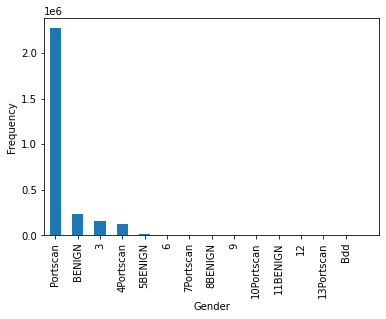

In [ ]:
tag = df.groupby(' Label')[' Label'].agg('count')
print(tag)
target = df[' Label']
target.value_counts().plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13], 
           ['Portscan','BENIGN', '3',                                    
            '4Portscan','5BENIGN', '6',
            '7Portscan','8BENIGN', '9',
            '10Portscan','11BENIGN', '12', 
            '13Portscan','Bdd' ])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.memory_usage(index=True).sum() 
import sys
sys.getsizeof(df)

1719151847

In [ ]:
print(df.shape)
print(df.columns)
print(df.info)
df.head(10)

del df['Fwd Avg Bytes/Bulk']
del df[' SYN Flag Count']
del df['Bwd Avg Bulk Rate']
del df[' RST Flag Count']
del df[' Fwd Avg Packets/Bulk']
del df[' Fwd Avg Bulk Rate']
del df[' ECE Flag Count']
del df[' CWE Flag Count']
del df[' Bwd URG Flags']
del df[' Bwd PSH Flags']
del df[' Bwd Avg Packets/Bulk']

(2830743, 79)
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Lengt

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# target = df[' Label']
# le = LabelEncoder()
# Y=le.fit_transform(target)

# print(np.average(Y))
# X=df.iloc[:,:-1]
# X = X.astype(np.float16 ,copy=False)

# X = X.apply(lambda col: ((col - col.min(axis=0)) / col.max(axis=0)))
# X = target.apply(lambda col: SS.fit_transform(col), axis=0, result_type='expand')

# X.drop(X.columns[31], axis=1,inplace=True)
# X.drop(X.columns[32], axis=1,inplace=True)
# 52
# 53

# 56 --- nan
# 57 --- nan
# 58 --- nan
# 59 --- nan
# 60 --- nan
# 61 --- nan
# 62 --- 1.0
# 63 --- 1.0
# 64 --- 1.0
# 65 --- 1.0
# 66 --- 1.0
# 67 --- 1.0
# 68 --- 1.0
# 69 --- inf

# print(X.shape)
# X.dropna()
# print(X.shape,np.max(np.max(X).astype(np.float64)))
count = -1
for i in np.max(df).astype(np.float16):
    count += 1
    print(count, '---',i)

In [ ]:
# df.columns
df.info()

In [ ]:

check_size_dtypes(df[' Fwd Header Length'])


In [133]:
check_size_dtypes(df['Total Length of Fwd Packets'])
df['Total Length of Fwd Packets'] = normalize(df['Total Length of Fwd Packets'])
df['Total Length of Fwd Packets'] =  convert_datatypes(df['Total Length of Fwd Packets'])

255 max
0 min
2827876 This is the memory usage
1470880    0
353744     0
1911717    0
2141611    0
2400299    0
1567545    0
356713     0
2198937    0
1991716    0
2626627    0
1568499    0
1424568    0
456901     0
1210049    0
1545951    0
301193     0
2380419    0
2597644    0
1095790    0
1715167    0
Name: Total Length of Fwd Packets, dtype: uint8
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [131]:
check_size_dtypes(df['FIN Flag Count'] )
df['FIN Flag Count'] = normalize(df['FIN Flag Count'])
df['FIN Flag Count']  =  convert_datatypes(df['FIN Flag Count'])

1 max
0 min
22623008 This is the memory usage
382752     0
2479706    0
807717     0
1210450    0
528121     0
1200779    0
330787     0
2446976    0
326878     0
1268304    0
1915243    0
2156770    0
1261397    1
1460520    0
30578      0
1854676    0
1127657    1
1232060    0
1026424    0
2806780    0
Name: FIN Flag Count, dtype: int64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [129]:
check_size_dtypes(df[' Avg Bwd Segment Size'])
# df[' Avg Bwd Segment Size'] = normalize(df[' Avg Bwd Segment Size'])
# df[' Avg Bwd Segment Size'] =  convert_datatypes(df[' Avg Bwd Segment Size'])

255 max
0 min
2827876 This is the memory usage
371424       0
465624       1
959236       0
1195810      1
1095899      0
560548       0
944216       0
2571743      1
2364303     84
2690516      7
1535491      5
2755196      2
89170      102
927080       5
282478       0
1458416      4
2579564     17
1349109     34
2656091      4
1657455      2
Name:  Avg Bwd Segment Size, dtype: uint8


In [142]:
from sklearn.preprocessing import LabelEncoder

target = df[' Label']
le = LabelEncoder()
target = le.fit_transform(target)

In [ ]:
# X = X.apply(lambda col: (col.astype('float16')))
X=df.iloc[:,:-1]
X.info()
X.head(15)

In [143]:
np.random.seed(0)
#x_train, x_test, y_train, y_test = train_test_split(label_puts, target, test_size = 0.99, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size = 0.20, random_state = 42)
print(x_train.shape,len(y_train),x_test.shape,len(y_test))
x_train.columns

(2262300, 55) 2262300 (565576, 55) 565576


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Max',
       'Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length',
       'Fwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' PSH Flag Count', ' ACK Flag Count',
       ' URG Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Fwd

In [ ]:
type(y_train[0])

numpy.int64

In [ ]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
attributes = list(x_train)
sorted(zip(model.feature_importances_, attributes), reverse=True)


# without removing low importance features
# [(0.06725226795705366, ' PSH Flag Count'
#  (0.04703924588265128, ' Destination Port'
#  (0.04336891200076948, ' min_seg_size_forward'
#  (0.032918258942460234, ' Avg Bwd Segment Size'
#  (0.0319151585200045, 'Init_Win_bytes_forward,
#  (0.031231904998846597, ' Bwd Packet Length Mn'),
#  (0.031043828667534953, 'Bwd Packet Length Max'),
#  (0.031022820331145052, ' Bwd Packet Length Min'),
#  (0.03084828251761542, ' Bwd Packet Length Std'),
#  (0.03072821850388161, ' Packet Length Std'),
#  (0.030100785213065997, ' Flow IAT Max'),
#  (0.028436521776347194, ' ACK Flag Count'),
#  (0.027281427074497808, ' Average Packet Size'),
#  (0.026910672034640138, ' Packet Length Mean'),
#  (0.026513534635049307, ' Fwd IAT Std'),
#  (0.02519386171930337, ' Idle Min'),
#  (0.02469951817650592, ' Packet Length Variance'),
#  (0.022650719915733662, ' Fwd IAT Max'),
#  (0.02149375931208453, 'Idle Mean'),
#  (0.021387643727711243, ' Idle Max'),
#  (0.019695679851880293, 'Fwd IAT Total'),
#  (0.018349326562034977, 'Fwd Packets/s'),
#  (0.017266255918316865, ' Min Packet Length'),
#  (0.015626674633139576, ' Flow Duration'),
#  (0.014118829080722541, ' Flow IAT Std'),
#  (0.013867841856553067, ' act_data_pkt_fwd'),
#  (0.013679521187193299, ' Fwd Packet Length Mean'),
#  (0.01331099626769552, ' Down/Up Ratio'),
#  (0.012939464770070725, ' Max Packet Length'),
#  (0.012047217861556263, 'Subflow Fwd Packets'),
#  (0.011862095567088867, ' Fwd IAT Mean'),
#  (0.011632402475019983, ' Fwd Header Length'),
#  (0.011358750784500476, ' Fwd Header Length.1'),
#  (0.010854538908848051, ' Fwd Packet Length Min'),
#  (0.010796586010746973, ' URG Flag Count'),
#  (0.009597693510985581, ' Fwd Packet Length Std'),
#  (0.00902441333452618, 'FIN Flag Count'),
#  (0.00877306577163478, ' Fwd Packet Length Max'),
#  (0.008720890407471942, ' Flow IAT Mean'),
#  (0.008226787320041931, ' Bwd Header Length'),
#  (0.007201896418642561, 'Bwd IAT Total'),
#  (0.0069803806388032096, ' Bwd IAT Max'),
#  (0.006945103049020648, ' Avg Fwd Segment Size'),
#  (0.0069378669203904566, ' Fwd IAT Min'),
#  (0.006887325250458923, ' Total Backward Packets'),
#  (0.006841765990321557, ' Init_Win_bytes_backward'),
#  (0.006626668993186727, ' Subflow Bwd Packets'),
#  (0.006300917761674071, ' Total Fwd Packets'),
#  (0.006126555533887571, ' Subflow Bwd Bytes'),
#  (0.00578242343095683, ' Total Length of Bwd Packets'),
#  (0.005532007932318445, ' Flow IAT Min'),
#  (0.005470814956938054, ' Subflow Fwd Bytes'),
#  (0.00510055920240283, ' Bwd IAT Mean'),
#  (0.004828698367963238, ' Bwd Packets/s'),
#  (0.004661449246139643, ' SYN Flag Count'),
#  (0.004656945025439365, 'Total Length of Fwd Packets'),
#  (0.004444226295005339, ' Bwd IAT Std'),
#  (0.004222930071229493, 'Fwd PSH Flags'),
#  (0.002980876838669248, ' Idle Std'),
#  (0.0022653559832381213, ' Bwd IAT Min'),
#  (0.0020928688268832575, ' Active Min'),
#  (0.001723731080556255, 'Active Mean'),
#  (0.0013829157201535125, ' Active Max'),
#  (0.00020451284954848723, ' Active Std'),
#  (9.758497430937929e-06, ' CWE Flag Count'),
#  (3.2564982464166172e-06, ' Fwd URG Flags'),
#  (1.447782419664425e-06, ' ECE Flag Count'),
#  (3.668511452909695e-07, ' RST Flag Count'),
#  (0.0, 'Fwd Avg Bytes/Bulk'),
#  (0.0, 'Bwd Avg Bulk Rate'),
#  (0.0, ' Fwd Avg Packets/Bulk'),
#  (0.0, ' Fwd Avg Bulk Rate'),
#  (0.0, ' Bwd URG Flags'),
#  (0.0, ' Bwd PSH Flags'),
#  (0.0, ' Bwd Avg Packets/Bulk'),
#  (0.0, ' Bwd Avg Bytes/Bulk')]

# ---------------------------------------------------------


# [(0.07310365579399741, ' PSH Flag Count'),
#  (0.046475815101709984, ' min_seg_size_forward'),
#  (0.045934770085670394, ' Destination Port'),
#  (0.04354801440171562, ' Avg Bwd Segment Size'),
#  (0.03856424646770225, ' Packet Length Std'),
#  (0.032581428295322824, 'Bwd Packet Length Max'),
#  (0.0304329734798864, ' Fwd IAT Std'),
#  (0.030004556066805278, 'Init_Win_bytes_forward'),
#  (0.02853429675537719, ' Bwd Packet Length Std'),
#  (0.027345633541044186, ' Bwd Packet Length Min'),
#  (0.026739433752677427, ' Average Packet Size'),
#  (0.026495206853878427, ' Packet Length Variance'),
#  (0.02535343343555042, ' ACK Flag Count'),
#  (0.02489962913912783, ' Packet Length Mean'),
#  (0.024063577466096442, ' Bwd Packet Length Mean'),
#  (0.022537784746346854, ' Idle Min'),
#  (0.022425677268801836, ' Idle Max'),
#  (0.021089457479274577, 'Fwd Packets/s'),
#  (0.020905120110969577, ' Fwd IAT Max'),
#  (0.020308971281282315, ' Flow IAT Max'),
#  (0.018813700501907404, 'Idle Mean'),
#  (0.018067791682025974, ' act_data_pkt_fwd'),
#  (0.01802237237287912, ' Max Packet Length'),
#  (0.017997843113228613, ' Min Packet Length'),
#  (0.017872511846361218, 'Fwd IAT Total'),
#  (0.017520951239622197, ' Flow IAT Std'),
#  (0.014881886721889226, ' Down/Up Ratio'),
#  (0.012914199615944012, ' Avg Fwd Segment Size'),
#  (0.012055797186893941, ' Flow Duration'),
#  (0.011631295140734983, ' Total Fwd Packets'),
#  (0.01107404719278104, 'Subflow Fwd Packets'),
#  (0.011006568007510521, ' URG Flag Count'),
#  (0.010921003583136375, ' Fwd Packet Length Std'),
#  (0.010356449469914123, ' Fwd Packet Length Mean'),
#  (0.01033395657536567, ' Fwd Header Length'),
#  (0.009830207428205373, ' Fwd IAT Mean'),
#  (0.009774355533804582, ' Fwd Packet Length Max'),
#  (0.009240395689139726, ' Fwd Header Length.1'),
#  (0.008618886892888398, ' Fwd Packet Length Min'),
#  (0.008352315753258288, 'Fwd PSH Flags'),
#  (0.007965808032871996, 'Total Length of Fwd Packets'),
#  (0.007922605037918536, ' Flow IAT Mean'),
#  (0.007318878754666738, 'Bwd IAT Total'),
#  (0.00675529351791052, 'FIN Flag Count'),
#  (0.006711274017472827, ' Subflow Bwd Packets'),
#  (0.006608910345913243, ' Bwd Header Length'),
#  (0.006242128250044523, ' Flow IAT Min'),
#  (0.006076130445719157, ' Subflow Fwd Bytes'),
#  (0.0059547031747178595, ' Init_Win_bytes_backward'),
#  (0.005889936504748974, ' Fwd IAT Min'),
#  (0.0058352876533357325, ' Total Backward Packets'),
#  (0.004719200925616161, ' Bwd IAT Max'),
#  (0.004436353459315346, ' Subflow Bwd Bytes'),
#  (0.004288540951000902, ' Bwd IAT Mean'),
#  (0.003736318063867649, ' Bwd Packets/s'),
#  (0.0035537665999495686, ' Bwd IAT Std'),
#  (0.0034097276914085944, ' Idle Std'),
#  (0.003350737930263424, ' Total Length of Bwd Packets'),
#  (0.002778802459990596, 'Active Mean'),
#  (0.002086141001009315, ' Active Min'),
#  (0.001986387335518348, ' Active Max'),
#  (0.0015935378649943417, ' Bwd IAT Min'),
#  (0.000138307198711042, ' Active Std'),
#  (1.1005712306563672e-05, ' Fwd URG Flags'),
#  (0.0, ' Bwd Avg Bytes/Bulk')]




[(0.06690100667896441, ' PSH Flag Count'),
 (0.058216087779977325, ' Destination Port'),
 (0.04861332355550372, ' min_seg_size_forward'),
 (0.04806183464065997, ' Avg Bwd Segment Size'),
 (0.04453371445806573, ' Average Packet Size'),
 (0.04255847124833064, ' Packet Length Std'),
 (0.038802730583122946, ' Bwd Packet Length Mean'),
 (0.03726604669718304, ' Fwd IAT Max'),
 (0.033130227855284175, ' Fwd IAT Std'),
 (0.031657894941570626, 'Idle Mean'),
 (0.029700974282850928, 'Init_Win_bytes_forward'),
 (0.029622252495992103, ' Idle Max'),
 (0.028765344515707197, ' Avg Fwd Segment Size'),
 (0.02833319672239302, ' Flow IAT Max'),
 (0.02756093527388941, ' Fwd Header Length'),
 (0.0269162747917426, ' Bwd Packet Length Std'),
 (0.026470866149284136, ' ACK Flag Count'),
 (0.02549206830249687, 'Bwd Packet Length Max'),
 (0.021708599173531434, ' Packet Length Mean'),
 (0.019101943160504616, 'Fwd Packets/s'),
 (0.018998546558886865, ' Packet Length Variance'),
 (0.01857977733946383, ' Flow Duration

In [ ]:
y_pred = model.predict(x_test)
y_pred

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
print(model.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

# 0.9984173777574454
# 0.9984173777574454
# 0.8329280909957083
# --------After removal of columns
# 0.9984350409521169--------
# 0.9984350409521169--------
# 0.8395713515182087
# -------------- After removal of columns and standardization of data
# 0.9983591948738985
# 0.9983591948738985
# 0.8782021432415873


0.996605230773583
0.996605230773583
0.8037094062777358


In [ ]:
x_train.sample(20)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Max,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Mean,Idle Std,Idle Max,Idle Min
187650,0.122072,5.543199,5,0,30,6,6,6.000000,0.000000,0,0,0.00000,0.000000,11.192110,33.333347,1.385808,3.918124,5,0,5.543188e+00,1.385797e+00,3.927263,6646825,0.000012,0,0,0,100,99.459190,0.000025,6,6,6.000000,0.000000,0.000000,0,0,1,0,7.200000,6.000000,0.000000,99.985580,5,30,0,0.000000e+00,0.392151,0.000000,4,99.999977,5.539062,0.000000,5,6646825
276227,0.675975,0.218747,8,9,944,596,0,118.000000,206.690933,2920,0,1016.00000,1013.510742,11.193758,33.334412,0.013682,0.023217,0,0,2.185825e-01,3.122607e-02,0.028505,80939,0.007943,232437,139489,0,172,99.459213,0.001016,0,2920,560.444458,849.380798,3.220749,0,1,0,0,593.411743,118.000000,1016.000000,99.985580,8,944,9,1.395066e-03,12.501526,0.202942,7,99.999977,0.000000,0.000000,0,0
712592,0.675975,0.770857,8,8,2725,2413,0,340.625000,840.954529,845,2,130.00000,290.403656,11.192285,33.333622,0.051401,0.113380,0,0,6.985525e-01,9.979321e-02,0.148705,379769,0.000012,838288,466547,0,180,99.459206,0.000288,0,2413,221.470581,600.538208,1.610027,0,1,0,0,235.312500,340.625000,130.000000,99.985580,8,2725,8,1.586689e-04,44.557190,62.498474,7,99.999977,0.000000,0.000000,0,0
273596,11.580072,0.000012,2,0,12,6,6,6.000000,0.000000,0,0,0.00000,0.000000,11.706690,66.666664,0.000012,0.000000,0,0,8.333333e-07,8.333333e-07,0.000000,1,0.000011,0,0,0,40,99.459190,66.666664,6,6,6.000000,0.000000,0.000000,0,0,1,0,9.000000,6.000000,0.000000,99.985580,2,12,0,0.000000e+00,0.576782,0.000000,1,99.999977,0.000000,0.000000,0,0
2259315,0.122072,69.075386,9,7,379,373,0,42.111111,124.099197,5792,0,1656.00000,2118.227295,11.192116,33.333336,4.605036,25.235771,68,0,6.900000e+01,8.583333e+00,34.632370,82700000,0.000011,148735,137191,0,284,99.459213,0.000004,0,5792,704.352966,1537.710449,10.556042,0,0,1,0,748.375000,42.111111,1656.428571,99.985580,9,379,7,1.769005e-03,0.384521,0.360107,2,99.999977,68.937500,0.000000,68,82700000
2434072,0.122072,83.887154,6,6,383,371,0,63.833332,150.509018,8688,0,1932.00000,3506.021729,11.192115,33.333336,7.626114,35.377251,82,0,8.416666e+01,1.675000e+01,52.480453,99500000,0.000013,101000000,101000000,0,184,99.459213,0.000002,0,8688,921.846130,2465.742432,27.142345,1,0,0,0,998.666687,63.833332,1932.500000,99.985580,6,383,6,1.769005e-03,0.001526,0.360107,2,99.999977,82.937500,0.000000,82,99500000
1756558,0.675975,98.488564,28,33,1134,517,0,40.500000,133.179489,2836,0,741.50000,793.024841,11.192119,33.333344,1.641487,4.605752,8,0,9.833334e+01,3.647725e+00,5.788192,10100000,0.000012,113000000,10100000,0,904,99.459290,0.000008,0,2836,412.983856,680.177856,2.065366,0,1,0,0,419.754089,40.500000,741.545455,99.985588,28,1134,33,3.733448e-03,44.557190,0.534058,4,99.999977,8.335938,0.005124,8,10000000
725140,0.675975,0.644943,6,5,958,517,0,159.666672,231.960922,137,0,33.59375,59.340542,11.192172,33.333569,0.064504,0.146250,0,0,4.300183e-01,8.600367e-02,0.166159,257347,0.000108,516951,258896,0,200,99.459206,0.000258,0,517,93.833336,174.789139,0.136389,0,1,0,0,102.363640,159.666672,33.600000,99.985580,6,958,5,2.563113e-05,44.557190,0.372314,3,99.999977,0.000000,0.0000

In [ ]:
# (0.0, 'Fwd Avg Bytes/Bulk'),
#  (0.0, 'Bwd Avg Bulk Rate'),
#  (0.0, ' Fwd Avg Packets/Bulk'),
#  (0.0, ' Fwd Avg Bulk Rate'),
#  (0.0, ' Bwd URG Flags'),
#  (0.0, ' Bwd PSH Flags'),
#  (0.0, ' Bwd Avg Packets/Bulk'),
#  (0.0, ' Bwd Avg Bytes/Bulk')]

# del df[" CWE Flag Count"]
# del df["Bwd Avg Bulk Rate"]
# del df[" Fwd Avg Packets/Bulk"]
# del df[' Fwd Avg Bulk Rate']
# del df[" Bwd URG Flags"]
# del df[' Bwd PSH Flags']
# del df[" Bwd Avg Packets/Bulk"]
                                                                       
# del df[" SYN Flag Count"]
# del df[" Fwd URG Flags"]
# del df["]
# del df[""]
# del df[""]
# del df[""]
# del df[""]
# 
# 
# 
# 
#  -----------------------DTC
#  (0.0, 'Fwd Avg Bytes/Bulk'),
#  (0.0, 'Bwd Avg Bulk Rate'),
#  (0.0, ' SYN Flag Count'),
#  (0.0, ' RST Flag Count'),
#  (0.0, ' Fwd URG Flags'),
#  (0.0, ' Fwd Avg Packets/Bulk'),
#  (0.0, ' Fwd Avg Bulk Rate'),
#  (0.0, ' ECE Flag Count'),
#  (0.0, ' CWE Flag Count'),
#  (0.0, ' Bwd URG Flags'),
#  (0.0, ' Bwd PSH Flags'),
#  (0.0, ' Bwd Avg Packets/Bulk'),
#  (0.0, ' Bwd Avg Bytes/Bulk')]
# RF
  # (0.0, 'Fwd Avg Bytes/Bulk'),
#  (0.0, 'Bwd Avg Bulk Rate'),
#  (0.0, ' RST Flag Count'),
#  (0.0, ' Fwd Avg Packets/Bulk'),
#  (0.0, ' Fwd Avg Bulk Rate'),
#  (0.0, ' ECE Flag Count'),
#  (0.0, ' Bwd URG Flags'),
#  (0.0, ' Bwd PSH Flags'),
#  (0.0, ' Bwd Avg Packets/Bulk'),
#  (0.0, ' Bwd Avg Bytes/Bulk')]

# 'Fwd Avg Bytes/Bulk'),
# SYN Flag Count')
#  (0.0, 'Bwd Avg Bulk Rate'),
#  (0.0, ' RST Flag Count'),
#  (0.0, ' Fwd Avg Packets/Bulk'),
#  (0.0, ' Fwd Avg Bulk Rate'),
#  (0.0, ' ECE Flag Count'),
#  (0.0, ' CWE Flag Count'),
#  (0.0, ' Bwd URG Flags'),
#  (0.0, ' Bwd PSH Flags'),
#  (0.0, ' Bwd Avg Packets/Bulk'),
#  (0.0, ' Bwd Avg Bytes/Bulk')]


In [ ]:
len(df.columns)

67

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 35)
dtc = dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
y_pred

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
print(dtc.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))
# -----------------------------
# 0.9984774326193281 after removal of columns
# 0.9984774326193281 after removal of columns
# 0.8667124765500696 after removal of columns

# ------------------------------------------ AFter removal of columns and standardization of data
# 0.9984140062520334
# 0.9984140062520334
# 0.9004401619867812

0.9965451150685319
0.9965451150685319
0.7985818024194927


In [ ]:
attributes = list(x_train)
sorted(zip(dtc.feature_importances_, attributes), reverse=True)
# ''' After removal of columns
# [(0.28016606811168726, ' Bwd Packet Length Std'),
#  (0.1733888947694944, ' Average Packet Size'),
#  (0.12351004475960135, ' Packet Length Variance'),
#  (0.11069568307466329, ' Fwd Packet Length Max'),
#  (0.09594752849111146, ' Destination Port'),
#  (0.06755557795314726, ' Flow IAT Std'),
#  (0.03493801525095952, ' Flow IAT Mean'),
#  (0.01883046832986224, 'Init_Win_bytes_forward'),
#  (0.018112034535505223, ' Fwd Header Length.1'),
#  (0.015792768068831394, ' Total Length of Bwd Packets'),
#  (0.007670806775145387, ' PSH Flag Count'),
#  (0.007375691302249404, ' Flow IAT Min'),
#  (0.007053658583930834, ' Fwd IAT Min'),
#  (0.006798316543684104, ' Init_Win_bytes_backward'),
#  (0.003698208209551507, ' Bwd IAT Mean'),
#  (0.003231974871338103, ' Bwd Packets/s'),
#  (0.0028835305365681294, ' Fwd IAT Std'),
#  (0.002531178337354747, ' Packet Length Mean'),
#  (0.0020148741561211853, ' Subflow Fwd Bytes'),
#  (0.001849292133856775, ' Active Std'),
#  (0.0017756112815919029, ' Subflow Bwd Bytes'),
#  (0.0017422225064747804, ' Bwd IAT Std'),
#  (0.001735979999222193, ' min_seg_size_forward'),
#  (0.0014089051417732659, ' act_data_pkt_fwd'),
#  (0.001039001917198709, ' Fwd Header Length'),
#  (0.0008479153051474898, ' Bwd Packet Length Mean'),
#  (0.0007103968653167402, ' Flow Duration'),
#  (0.0005975280224517197, ' Fwd IAT Mean'),
#  (0.0005879066183263844, ' Fwd Packet Length Min'),
#  (0.00048147632219934565, ' Avg Fwd Segment Size'),
#  (0.00046751665611389034, ' Avg Bwd Segment Size'),
#  (0.00046193767822552304, ' Fwd Packet Length Std'),
#  (0.0004135138254924596, 'Total Length of Fwd Packets'),
#  (0.00041328739480660486, ' Flow IAT Max'),
#  (0.00030597314465320984, 'Subflow Fwd Packets'),
#  (0.00026962660081438633, ' Min Packet Length'),
#  (0.00026572709485670224, ' URG Flag Count'),
#  (0.00025500760488335724, 'Fwd IAT Total'),
#  (0.00023741983955396956, ' Bwd IAT Min'),
#  (0.00021367862064914888, 'Fwd Packets/s'),
#  (0.00018878988623811886, ' Fwd IAT Max'),
#  (0.00018270426067764855, 'Bwd Packet Length Max'),
#  (0.00015394740150137702, 'Fwd PSH Flags'),
#  (0.00015233484758006682, 'Bwd IAT Total'),
#  (0.00014963252434221794, ' Down/Up Ratio'),
#  (0.00011460363907694974, ' ACK Flag Count'),
#  (0.00011027266081469523, ' Subflow Bwd Packets'),
#  (0.00010582054978144025, ' Packet Length Std'),
#  (0.00010059309850460571, ' Max Packet Length'),
#  (9.414921214447345e-05, ' Idle Min'),
#  (7.941917652496808e-05, ' Total Backward Packets'),
#  (6.328853154705063e-05, ' Fwd Packet Length Mean'),
#  (5.221072466639542e-05, ' Active Max'),
#  (3.774487080623856e-05, ' Bwd IAT Max'),
#  (3.4065258530539905e-05, ' Idle Std'),
#  (3.204165726561617e-05, ' Bwd Header Length'),
#  (1.975936604384112e-05, 'FIN Flag Count'),
#  (1.9724799376597006e-05, ' Total Fwd Packets'),
#  (1.445375939585674e-05, ' Idle Max'),
#  (6.626751842307504e-06, ' Active Min'),
#  (6.228453832736674e-06, 'Active Mean'),
#  (4.623810405522742e-06, ' Bwd Packet Length Min'),
#  (1.7175246854056034e-06, 'Idle Mean'),
#  (0.0, ' Fwd URG Flags'),
#  (0.0, ' Bwd Avg Bytes/Bulk')] '''


# After removal of columns and stardardization of data
# [(0.28081615120727976, ' Bwd Packet Length Std'),
#  (0.17342584039345477, ' Average Packet Size'),
#  (0.12443267029574392, ' Packet Length Variance'),
#  (0.11023026556712232, ' Fwd Packet Length Max'),
#  (0.09746895785153119, ' Destination Port'),
#  (0.06745392528933074, ' Flow IAT Std'),
#  (0.03451220274130996, ' Flow IAT Mean'),
#  (0.019190152548959546, ' Fwd Header Length'),
#  (0.017462324426230795, ' Subflow Bwd Bytes'),
#  (0.017459279711913734, 'Init_Win_bytes_forward'),
#  (0.007414904307686484, ' PSH Flag Count'),
#  (0.006700317437963121, ' Init_Win_bytes_backward'),
#  (0.006663308257260486, ' Fwd IAT Min'),
#  (0.006044352514880975, 'Idle Mean'),
#  (0.005355512124356029, ' min_seg_size_forward'),
#  (0.0036568915883058235, ' Packet Length Mean'),
#  (0.0034312123976469504, ' Idle Std'),
#  (0.0028462804526412193, ' Fwd IAT Mean'),
#  (0.002602149646224776, ' Bwd Packet Length Mean'),
#  (0.0014574049358381167, 'Fwd Packets/s'),
#  (0.001144727323678923, ' Fwd Packet Length Mean'),
#  (0.0009776331906792724, ' Flow Duration'),
#  (0.0009776052620744666, ' Avg Bwd Segment Size'),
#  (0.0009451194161910165, ' Flow IAT Min'),
#  (0.0008056073797510606, ' Fwd IAT Std'),
#  (0.0008041586301102237, ' Subflow Fwd Bytes'),
#  (0.0007283035349229918, ' Max Packet Length'),
#  (0.0005657124060944584, 'Bwd Packet Length Max'),
#  (0.0005470064893224677, 'Total Length of Fwd Packets'),
#  (0.00047975391134993305, ' Fwd Packet Length Std'),
#  (0.00047771592488278036, ' Fwd IAT Max'),
#  (0.00037293438198067377, ' Fwd Packet Length Min'),
#  (0.00030169869211160504, 'Flow Bytes/s'),
#  (0.00028136749737304843, ' Min Packet Length'),
#  (0.000273780967577527, ' Idle Min'),
#  (0.00020469376312760802, ' URG Flag Count'),
#  (0.00018746746412100034, ' Bwd IAT Max'),
#  (0.0001790807723947673, ' Subflow Bwd Packets'),
#  (0.00017207570059626418, ' ACK Flag Count'),
#  (0.00016162335200744376, ' Flow Packets/s'),
#  (0.00015204646779520066, ' Total Backward Packets'),
#  (0.00015203629652474893, ' Packet Length Std'),
#  (0.0001425175604447684, 'Fwd PSH Flags'),
#  (9.503481344511872e-05, 'FIN Flag Count'),
#  (8.928384850564696e-05, 'Bwd IAT Total'),
#  (5.9174596124725984e-05, ' Avg Fwd Segment Size'),
#  (3.2795406148957585e-05, 'Subflow Fwd Packets'),
#  (1.6901180938118678e-05, ' Total Fwd Packets'),
#  (1.2790231641322964e-05, ' Idle Max'),
#  (1.0136842077547119e-05, ' Flow IAT Max'),
#  (8.902492042750681e-06, ' Bwd Header Length'),
#  (8.493611656901823e-06, ' act_data_pkt_fwd'),
#  (7.716896626203414e-06, ' Bwd Packet Length Min'),
#  (0.0, 'Fwd IAT Total'),
#  (0.0, ' Fwd Header Length.1')]


 


[(0.2841986687385719, ' Bwd Packet Length Std'),
 (0.1205062740170743, ' Average Packet Size'),
 (0.11226953333492203, ' Avg Bwd Segment Size'),
 (0.10739965783960106, 'Total Length of Fwd Packets'),
 (0.09785351344591915, ' Total Backward Packets'),
 (0.07233203131516476, ' Min Packet Length'),
 (0.05529314115453851, ' Destination Port'),
 (0.03630655122223505, 'Fwd Packets/s'),
 (0.013242193017545584, ' Fwd Header Length'),
 (0.012428438875777277, ' Flow IAT Max'),
 (0.012147270876081829, ' Init_Win_bytes_backward'),
 (0.011285773419572081, ' Packet Length Mean'),
 (0.01013688836205035, ' Fwd IAT Max'),
 (0.005807709516039644, 'Idle Mean'),
 (0.00561459872965805, 'Fwd PSH Flags'),
 (0.005496011744640998, 'FIN Flag Count'),
 (0.004894725169502786, ' PSH Flag Count'),
 (0.004525055352380332, 'Init_Win_bytes_forward'),
 (0.003992293632705794, ' min_seg_size_forward'),
 (0.003990039286765114, ' Fwd IAT Std'),
 (0.0036360207527965202, 'Bwd IAT Total'),
 (0.002526940953714889, ' Flow IAT M

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(dtc,X,Y,cv=10)
# array([0.97643734, 0.99840325, 0.99742471, 0.99876711, 0.99574316,
      #  0.99814536, 0.99919809, 0.9984845 , 0.99836439, 0.98740612])

array([0.97643734, 0.99840325, 0.99742471, 0.99876711, 0.99574316,
       0.99814536, 0.99919809, 0.9984845 , 0.99836439, 0.98740612])

In [ ]:
print('---------------------------Random Forest CLassifier------------------')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =5)
model = model.fit(x_train, y_train)
rfy_pred = model.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(model.score(x_test,y_test))
# 0.9985904770652249

---------------------------Random Forest CLassifier------------------
0.9964461009660948


In [ ]:
attributes = list(x_train)
sorted(zip(model.feature_importances_, attributes), reverse=True)
# After removal of zero weight columns
# (0.112366494671202, ' Bwd Packet Length Std'),
#  (0.06433679659855031, ' Fwd Packet Length Max'),
#  (0.056751604919560494, ' Bwd Header Length'),
#  (0.053961465096857064, ' Packet Length Std'),
#  (0.05211168968251292, ' Avg Bwd Segment Size'),
#  (0.04711769474558417, ' Packet Length Variance'),
#  (0.047111200354155815, ' Destination Port'),
#  (0.04381627786972093, ' Bwd Packets/s'),
#  (0.042386429958200925, ' Subflow Fwd Bytes'),
#  (0.04204987126438914, ' Subflow Bwd Bytes'),
#  (0.04094738171388945, ' Fwd Packet Length Mean'),
#  (0.034804649193391636, ' Bwd Packet Length Mean'),
#  (0.032309913776511615, 'Total Length of Fwd Packets'),
#  (0.030449813998609403, ' Bwd Packet Length Min'),
#  (0.02745081831343994, 'Init_Win_bytes_forward'),
#  (0.02152068692183791, ' Avg Fwd Segment Size'),
#  (0.020606145634675384, ' Total Fwd Packets'),
#  (0.020281391542833906, ' Fwd Header Length'),
#  (0.019122836450544096, ' Average Packet Size'),
#  (0.017856029235357555, ' Fwd IAT Min'),
#  (0.016114650228562403, ' Total Length of Bwd Packets'),
#  (0.01511369436086099, ' Flow IAT Mean'),
#  (0.01462071528436822, 'Bwd Packet Length Max'),
#  (0.013104362732868127, ' Fwd IAT Std'),
#  (0.012588503895913216, ' Fwd Header Length.1'),
#  (0.010829394542185674, ' Flow Duration'),
#  (0.010589833636965276, 'Subflow Fwd Packets'),
#  (0.008664120438680232, ' Flow IAT Min'),
#  (0.006618671803804302, ' Fwd IAT Mean'),
#  (0.0062142762806988204, 'Fwd Packets/s'),
#  (0.005823333750440481, ' Flow IAT Max'),
#  (0.005511802056849195, ' Flow IAT Std'),
#  (0.004975819470764161, 'Bwd IAT Total'),
#  (0.004627758535310539, ' Fwd IAT Max'),
#  (0.00427590994074193, ' Packet Length Mean'),
#  (0.0035639700897044913, ' act_data_pkt_fwd'),
#  (0.003493204652573267, ' Init_Win_bytes_backward'),
#  (0.003374753383737507, ' PSH Flag Count'),
#  (0.002515781500541767, 'Idle Mean'),
#  (0.0024516354845426636, ' min_seg_size_forward'),
#  (0.0022335619575645444, ' ACK Flag Count'),
#  (0.0019732395805961366, ' Fwd Packet Length Min'),
#  (0.0014831160895369868, 'Fwd IAT Total'),
#  (0.0014772666869454546, ' Bwd IAT Min'),
#  (0.0013384636148983016, ' Active Max'),
#  (0.0012520161369063434, 'FIN Flag Count'),
#  (0.0011475731461011319, ' Subflow Bwd Packets'),
#  (0.0010386363262575413, ' Idle Min'),
#  (0.0009966626895916914, ' Fwd Packet Length Std'),
#  (0.0008592233719482215, ' Max Packet Length'),
#  (0.0006909782162334799, ' Idle Std'),
#  (0.0006473875360388798, ' URG Flag Count'),
#  (0.0006114456684819397, ' Bwd IAT Max'),
#  (0.00036808559597668086, ' Bwd IAT Mean'),
#  (0.0003629025503343455, ' Active Std'),
#  (0.00029293235026810893, ' Idle Max'),
#  (0.00025669564002782765, ' Min Packet Length'),
#  (0.00017962329022629367, 'Fwd PSH Flags'),
#  (0.00011231918372564187, ' Total Backward Packets'),
#  (8.998730128113458e-05, ' Bwd IAT Std'),
#  (7.53315373177969e-05, ' Down/Up Ratio'),
#  (3.7701044193251527e-05, ' Active Min'),
#  (3.760200258525163e-05, 'Active Mean'),
#  (5.86447102523287e-06, ' Fwd URG Flags'),
#  (0.0, ' Bwd Avg Bytes/Bulk')]

[(0.145025745627561, ' Packet Length Variance'),
 (0.06267163493604241, ' Destination Port'),
 (0.0613918930084727, ' PSH Flag Count'),
 (0.0587190302579525, ' Avg Bwd Segment Size'),
 (0.05567222321678052, 'Bwd Packet Length Max'),
 (0.05363953853421155, ' Fwd IAT Max'),
 (0.05134533203335825, 'Total Length of Fwd Packets'),
 (0.05109128945754957, ' Fwd Packet Length Std'),
 (0.03675270238645671, 'Init_Win_bytes_forward'),
 (0.036362303411364885, ' Fwd Header Length'),
 (0.03456560673549618, ' Avg Fwd Segment Size'),
 (0.0322907394110563, ' Bwd Packet Length Min'),
 (0.03165224756469898, ' Flow IAT Mean'),
 (0.027649571191133194, 'Fwd Packets/s'),
 (0.027577997989101884, ' min_seg_size_forward'),
 (0.027526175213779196, ' Packet Length Std'),
 (0.022985435197068013, ' Fwd Packet Length Max'),
 (0.01622232951297151, ' Average Packet Size'),
 (0.0157778643055697, ' Max Packet Length'),
 (0.015208580293901819, ' Fwd IAT Std'),
 (0.014542295433024191, ' ACK Flag Count'),
 (0.0139264705846

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
print(model.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

# 0.9985904770652249
# 0.9984774326193281
# 0.8667124765500696

# 0.9984971073737217
# 0.9984140062520334
# 0.9004401619867812

# After normalization and removal of columns
# 0.9964461009660948
# 0.9965451150685319
# 0.7985818024194927


0.9964461009660948
0.9965451150685319
0.7985818024194927


In [ ]:
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Max,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Mean,Idle Std,Idle Max,Idle Min
0,83.718624,0.000013,2,0,12,6,6,6.0,0.0,0,0,0.0,0.0,11.363636,44.444443,0.000013,0.0,0,0,0.0,0.000002,0.0,3,0.000012,0,0,0,40,99.459190,22.222221,6,6,6.0,0.0,0.0,0,0,1,0,9.0,6.0,0.0,99.98558,2,12,0,0.000000e+00,0.051880,0.000000,1,99.999977,0.0,0.0,0,0
1,84.007019,0.000102,1,1,6,6,6,6.0,0.0,6,6,6.0,0.0,11.196831,33.639145,0.000102,0.0,0,0,0.0,0.000000,0.0,0,0.000010,0,0,0,20,99.459198,0.305810,6,6,6.0,0.0,0.0,0,0,1,1,9.0,6.0,6.0,99.98558,1,6,1,9.153974e-07,0.045776,0.392151,0,99.999977,0.0,0.0,0,0
2,84.008545,0.000054,1,1,6,6,6,6.0,0.0,6,6,6.0,0.0,11.202005,33.974358,0.000054,0.0,0,0,0.0,0.000000,0.0,0,0.000010,0,0,0,20,99.459198,0.641026,6,6,6.0,0.0,0.0,0,0,1,1,9.0,6.0,6.0,99.98558,1,6,1,9.153974e-07,0.045776,0.392151,0,99.999977,0.0,0.0,0,0
3,70.551614,0.000039,1,1,6,6,6,6.0,0.0,6,6,6.0,0.0,11.207245,34.313725,0.000039,0.0,0,0,0.0,0.000000,0.0,0,0.000010,0,0,0,20,99.459198,0.980392,6,6,6.0,0.0,0.0,0,0,1,1,9.0,6.0,6.0,99.98558,1,6,1,9.153974e-07,0.048828,0.503540,0,99.999977,0.0,0.0,0,0
4,83.715572,0.000013,2,0,12,6,6,6.0,0.0,0,0,0.0,0.0,11.363636,44.444443,0.000013,0.0,0,0,0.0,0.000002,0.0,3,0.000012,0,0,0,40,99.459190,22.222221,6,6,6.0,0.0,0.0,0,0,1,0,9.0,6.0,0.0,99.98558,2,12,0,0.000000e+00,0.050354,0.000000,1,99.999977,0.0,0.0,0,0


In [ ]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
type(X[' ACK Flag Count'][0])

numpy.uint8

In [ ]:
l = X.values
len(l)

2827876

In [ ]:
target

0          BENIGN
1          BENIGN
2          BENIGN
3          BENIGN
4          BENIGN
            ...  
2830738    BENIGN
2830739    BENIGN
2830740    BENIGN
2830741    BENIGN
2830742    BENIGN
Name:  Label, Length: 2827876, dtype: object

In [ ]:
# string
# df.new_col = string
len(ll[3])
ll[1]

'1091550541091166666.00.0666.00.0110091.743118348.62385109.00.010910900.00.00000.00.0000020209174.3119269999999174.311926999999666.00.00.0001119.06.06.0201616292560200.00.0000.00.000'

In [ ]:
df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,1,0,0,9.0,6.0,0.0,40,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,1,1,1,9.0,6.0,6.0,20,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,1,1,1,9.0,6.0,6.0,20,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,1,1,1,9.0,6.0,6.0,20,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,1,0,0,9.0,6.0,0.0,40,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


NameError: ignored

In [ ]:
X.sample(1000)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Max,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Mean,Idle Std,Idle Max,Idle Min
1336925,192,0,0,1,6,0,0,0,0,0,0,0,0,38,87,0,0,0,0,0,0,0,0,0,0,0,0,20,48,2,1,0,0,0,0,0,0,1,1,9,6,6.000000,221,0,0,0,0,3,0,0,129,0,0,0,0
2042665,0,0,0,2,68,0,3,1,0,0,5,2,0,38,85,0,0,0,0,0,0,0,2,0,0,47,0,64,48,0,5,0,3,0,0,0,0,0,0,58,34,66.000000,221,0,0,0,0,0,0,0,151,0,0,0,0
539568,1,0,0,0,12,0,0,0,0,0,0,0,0,38,85,0,0,0,0,0,0,0,71,0,0,0,0,40,48,0,1,0,0,0,0,0,0,1,0,9,6,0.000000,221,0,0,0,0,1,0,0,129,0,0,0,0
509350,1,11,0,6,376,1,0,1,2,29,0,41,28,38,85,0,3,10,0,11,1,4,176,0,1,6,0,224,48,0,0,23,27,36,5,0,1,0,0,121,37,944.000000,221,0,0,0,0,31,0,0,129,0,0,0,0
1473443,0,246,0,14,514,4,0,1,3,23,0,5,14,38,85,8,14,21,0,246,16,12,32,0,235,32,0,332,48,0,0,18,5,17,1,0,1,0,0,76,32,126.857143,221,0,0,0,0,31,3,0,129,21,0,21,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132317,0,0,0,2,78,0,4,1,0,1,7,3,0,38,85,0,0,0,0,0,0,0,49,0,0,3,0,64,48,0,6,0,4,1,0,0,0,0,0,69,39,80.000000,221,0,0,0,0,0,0,0,151,0,0,0,0
142138,0,201,0,4,56,0,0,0,0,114,0,127,128,38,85,18,76,181,0,201,28,96,192,0,0,182,0,172,48,0,0,90,68,134,70,0,0,1,0,203,7,2900.250000,221,0,0,0,0,1,0,0,129,100,178,181,202
1502371,0,0,0,2,82,0,4,1,0,0,6,3,0,38,86,0,0,0,0,0,0,0,5,0,0,4,0,40,48,1,7,0,4,1,0,0,0,0,0,68,41,76.000000,221,0,0,0,0,0,0,0,129,0,0,0,0
1234998,0,0,0,2,82,0,4,1,0,0,6,3,0,38,86,0,0,0,0,0,0,0,47,0,0,4,0,40,48,1,7,0,4,0,0,0,0,0,0,67,41,73.000000,221,0,0,0,0,0,0,0,129,0,0,0,0


In [161]:
# df.to_hdf(filename, 'data', mode='w', format='table')
# for i in l:
  # for j in i:
    # print(type(j), 'this is j', j )
  # break
len(target)

2827876

In [147]:
c = X.values
c[55]

array([215,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        32, 170,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,   0,
         0, 221,  48,  56,   1,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   6,   0, 221,   0,   0,   0,   0,   1,   0,   0, 129,   0,
         0,   0,   0], dtype=uint8)

In [153]:
mother_list = []
for i in c:
  kid_list = ''
  for j in i:
    kid_list += str(j)
    kid_list += ' '
  mother_list.append(kid_list)



In [151]:
X[' ACK Flag Count'].shape

(2827876,)

In [152]:
target.shape

(2827876,)

In [154]:
len(mother_list)

2827876

In [156]:
mother_list[0]

'213 0 0 0 0 0 0 0 0 0 0 0 0 32 170 0 0 0 0 0 0 0 3 0 0 0 0 221 48 56 1 0 0 0 0 0 0 1 0 0 6 0 221 0 0 0 0 0 0 0 129 0 0 0 0 '

In [162]:
df = pd.DataFrame(list(zip(mother_list, target)),
               columns =['packet-data', 'label'])

In [165]:
df.label.value_counts()

0     2271320
4      230124
10     158804
2      128025
3       10293
7        7935
11       5897
6        5796
5        5499
1        1956
12       1507
14        652
9          36
13         21
8          11
Name: label, dtype: int64

In [168]:
filename = '/content/drive/MyDrive/MNAD-FYP/MADBERT/stringdata.h5'
df.to_hdf(filename, 'data', mode='w', format='table')


In [171]:
df

,packet-data,label
0,213 0 0 0 0 0 0 0 0 0 0 0 0 32 170 0 0 0 0 0 0...,0
1,214 0 0 0 0 0 0 0 0 0 0 0 0 32 128 0 0 0 0 0 0...,0
2,214 0 0 0 0 0 0 0 0 0 0 0 0 32 129 0 0 0 0 0 0...,0
3,179 0 0 0 0 0 0 0 0 0 0 0 0 32 131 0 0 0 0 0 0...,0
4,213 0 0 0 0 0 0 0 0 0 0 0 0 32 170 0 0 0 0 0 0...,0
...,...,...
2827871,0 0 0 0 0 0 3 1 0 0 6 3 0 32 127 0 0 0 0 0 0 0...,0
2827872,0 0 0 0 0 0 4 1 0 2 15 7 0 32 128 0 0 0 0 0 0 ...,0
2827873,225 0 0 0 0 0 0 0 0 0 0 0 0 32 129 0 0 0 0 0 0...,0
2827874,0 2 0 0 0 0 3 1 0 1 11 5 0 32 127 0 1 2 0 2 0 ...,0


In [174]:
type(df['packet-data'].values[0])

str